#### Ανδρόνικος Φιλάνδρας 1115201400214
##### Δήμητρα Κούστα 1115201600263

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Ξεκιναμε με το να τραβήξουμε τα δεδομενα απο το αρχειο μας:

In [64]:
Location = r'./Data/netflix_titles.csv'

df =  pd.read_csv(Location)
df = df.dropna(subset=['type', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


### Ερωτημα 1

"Μαζεύουμε" τις στήλες βάση τύπου (ταινία ή σειρά):

In [65]:
df1 = df.groupby('type', as_index=False).count()
df1 = df1[["type", "show_id"]]
df1.columns = ["Type", "Amount"]
df1

,Type,Amount
0,Movie,4673
1,TV Show,135


### Ερωτημα 2

Μετατρέπουμε την ημερομηνία ώστε να έχει μόνο χρονιά, κρατάμε μόνο τις ταινίες (και αντίστοιχα μετά για τις σειρές) και
κάνουμε group by date ώστε να φτιάξουμε το plot

In [66]:
df2 = df.copy()
df2['date_added'] = pd.to_datetime(df2['date_added'], dayfirst=True)
df2['date_added'] = pd.DatetimeIndex(df2['date_added']).year
df2 = df2.sort_values('date_added')

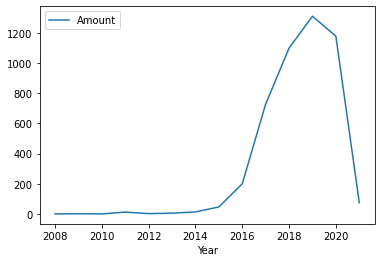

In [67]:
Movies = df2[df2["type"] == 'Movie']
Movies = Movies.groupby(["date_added"], as_index=False).count()
Movies = Movies[["date_added", "show_id"]]
Movies.columns = ["Year", "Amount"]

Movies.plot(x='Year', y='Amount', kind='line')
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

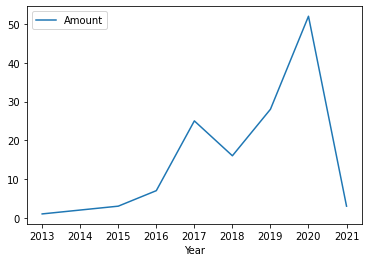

In [68]:
TV_Shows = df2[df2["type"] == 'TV Show']
TV_Shows = TV_Shows.groupby(["date_added"], as_index=False).count()
TV_Shows = TV_Shows[["date_added","show_id"]]
TV_Shows.columns = ["Year", "Amount"]

TV_Shows.plot(x='Year', y="Amount",kind='line')
plt.plot

### Ερωτημα 3

Μετράμε τις χώρες με value_counts και κρατάμε την πρώτη με head(1)

In [69]:
df['country'].value_counts().head(1)

United States    1653
Name: country, dtype: int64

### Ερωτημα 4

Για ε̲π̲ι̲λ̲ο̲γ̲ή̲ ά̲λ̲λ̲η̲ς̲ χ̲ώ̲ρ̲α̲ς̲  , πέραν της Αμερικής που εκτυπώνεται by default, αρκεί ο χρήστης να αλλάξει στο επόμενο κελί 
την μεταβλητή country4: 

In [70]:
df4 = df.copy()
country4 = 'United States'

Κρατάμε πρώτα μόνο τις ταινίες και μετράμε τα είδη χρησιμοποιώντας split στα κόμματα για να μετρήσουμε σωστά καθώς κάποιες ταινίες έχουν παραπάνω από ένα είδος, χωρισμένα με ",".

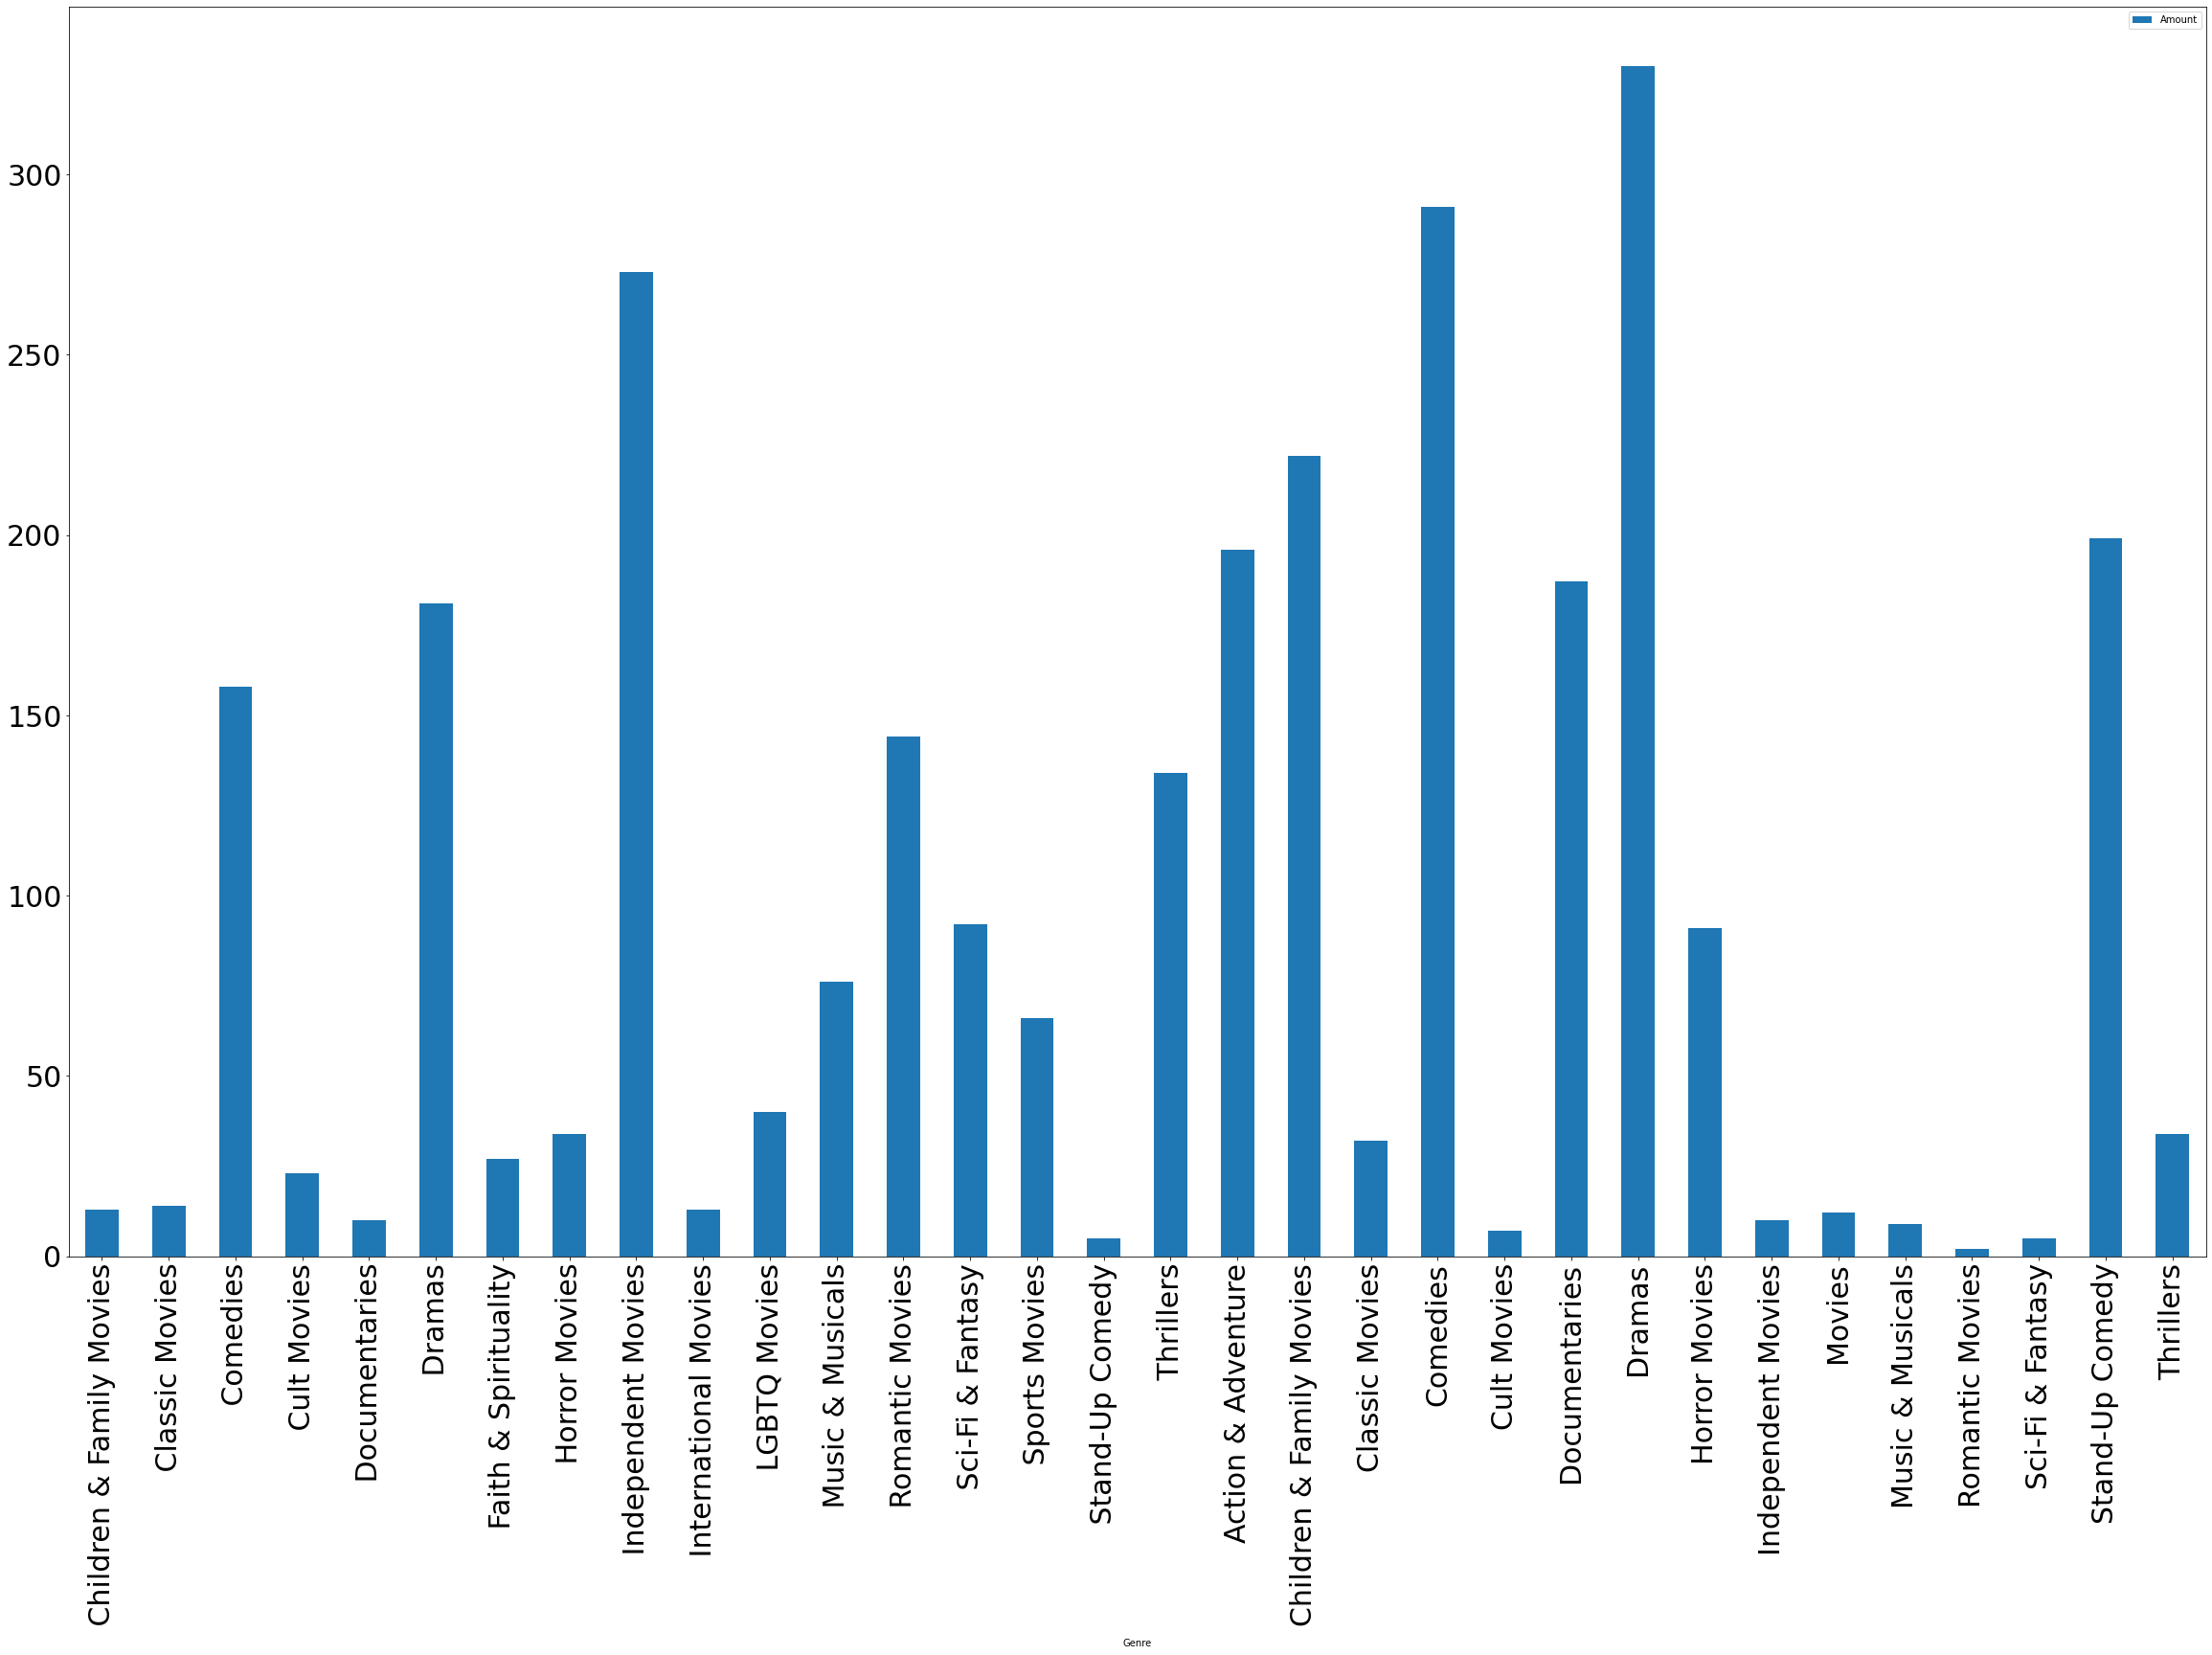

In [71]:
Movies4 = df4[df4['type'] == 'Movie']
Movies4 = Movies4[Movies4['country'] == country4]

Movies4 = Movies4.groupby(["listed_in"], as_index=False).count()
Movies4 = Movies4[['listed_in', 'show_id']]
Movies4.columns = ['Genre', 'Amount']
Movies4 = Movies4.reset_index()
Movies4['Genre'] = Movies4['Genre'].str.split(',')

Movies4 = (Movies4
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))

Movies4 = Movies4.groupby(['Genre'], as_index=False).sum()

Movies4.plot(x ='Genre', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

Κάνουμε το ίδιο για τις σειρές:

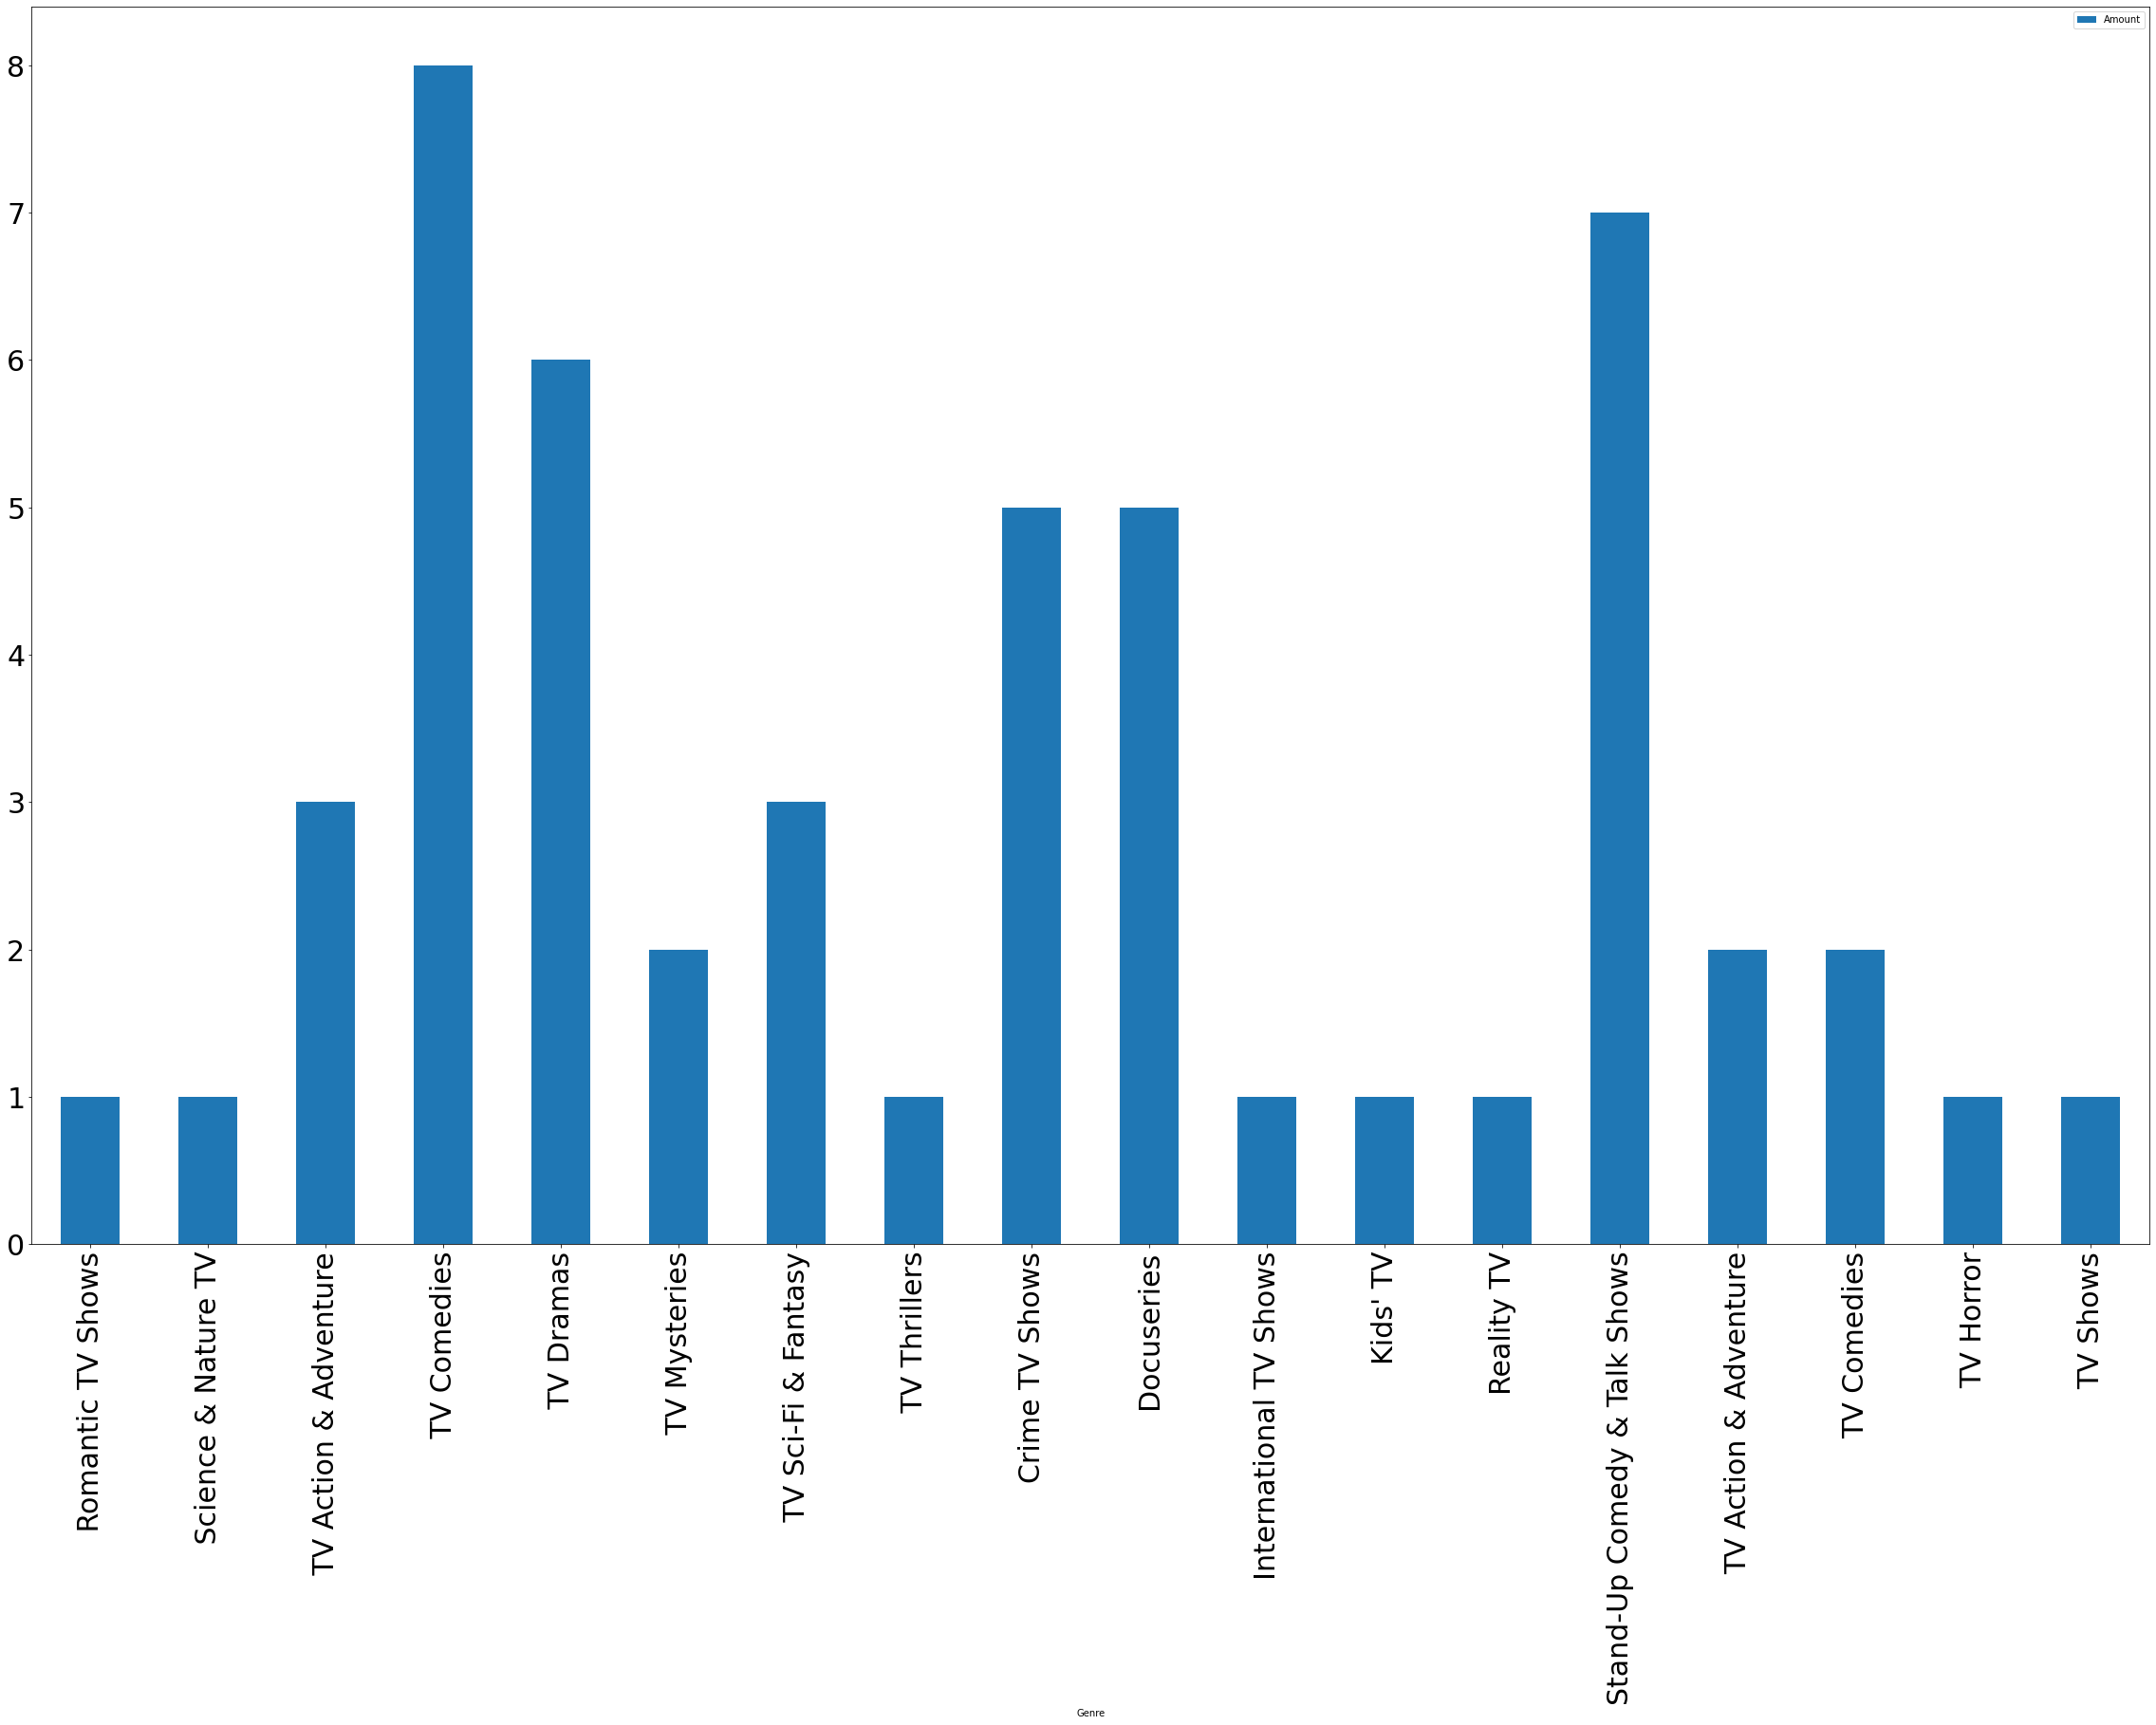

In [72]:
TV_Shows4 = df4[df4['type'] == 'TV Show']
TV_Shows4 = TV_Shows4[TV_Shows4['country'] == country4]

TV_Shows4 = TV_Shows4.groupby(["listed_in"], as_index=False).count()
TV_Shows4 = TV_Shows4[['listed_in', 'show_id']]
TV_Shows4.columns = ['Genre', 'Amount']
TV_Shows4 = TV_Shows4.reset_index()
TV_Shows4['Genre'] = TV_Shows4['Genre'].str.split(',')


TV_Shows4 = (TV_Shows4
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))

TV_Shows4 = TV_Shows4.groupby(['Genre'], as_index=False).sum()

TV_Shows4.plot(x ='Genre', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

### Ερωτημα 5

Για ε̲π̲ι̲λ̲ο̲γ̲ή̲ ά̲λ̲λ̲η̲ς̲ χ̲ώ̲ρ̲α̲ς̲  , πέραν της Ισπανίας που εκτυπώνεται by default, αρκεί ο χρήστης να αλλάξει στο επόμενο κελί 
την μεταβλητή country5: 

In [73]:
df5 = df.copy()

country5 = 'Spain'

Κρατάμε μόνο τις ταινίες και κάνουμε group by και count τους ηθοποιούς κάνοντας split στα κόμματα. Έτσι, φτιάχνουμε το plot
βάση Actor και Amound.

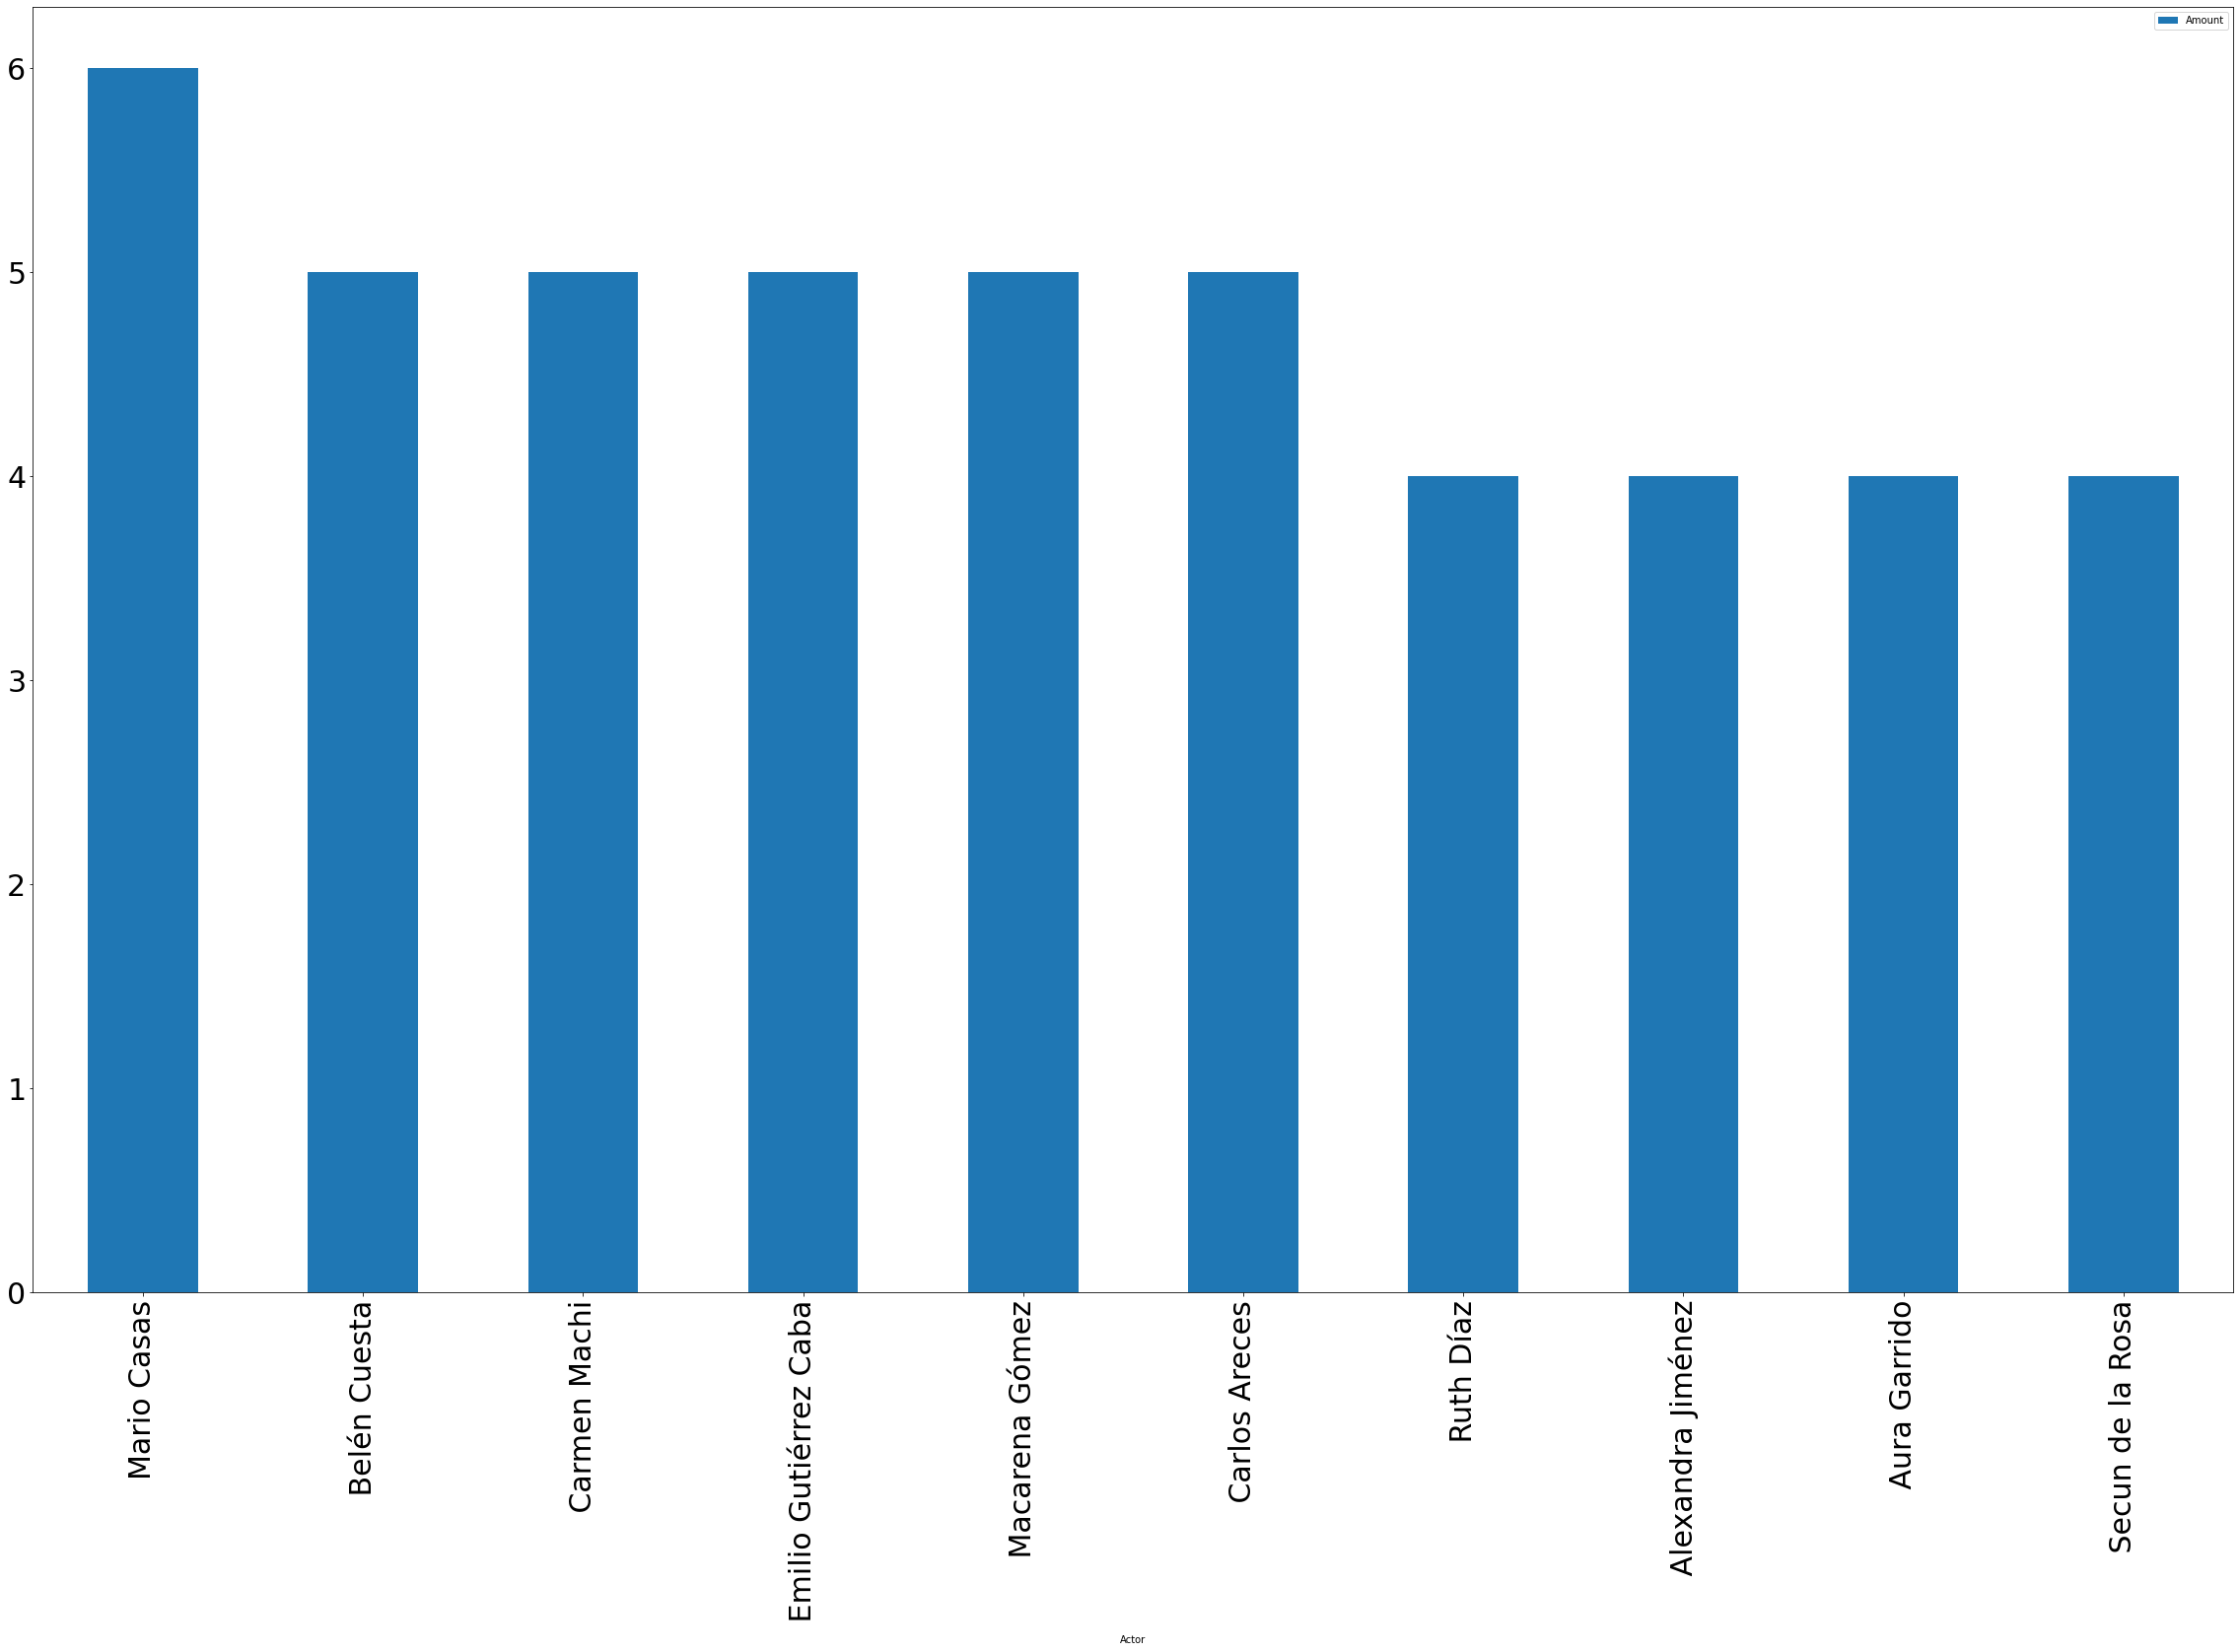

In [74]:
Movies5 = df5[df5['type'] == 'Movie']
Movies5 = Movies5[Movies5['country'] == country5]
Movies5 = Movies5.reset_index()

Movies5 = Movies5.groupby(["cast"], as_index=False).count()
Movies5 = Movies5[['cast', 'show_id']]
Movies5.columns = ['Actor', 'Amount']
Movies5 = Movies5.reset_index()
Movies5['Actor'] = Movies5['Actor'].str.split(',')

Movies5 = (Movies5
 .set_index(['index','Amount'])['Actor']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Actor'}))

Movies5 = Movies5.groupby(['Actor'], as_index=False).sum()
Movies5 = Movies5.sort_values('Amount', ascending=False)
Movies5 = Movies5.head(10)

Movies5.plot(x ='Actor', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()


Ομοίως για τις σειρές.

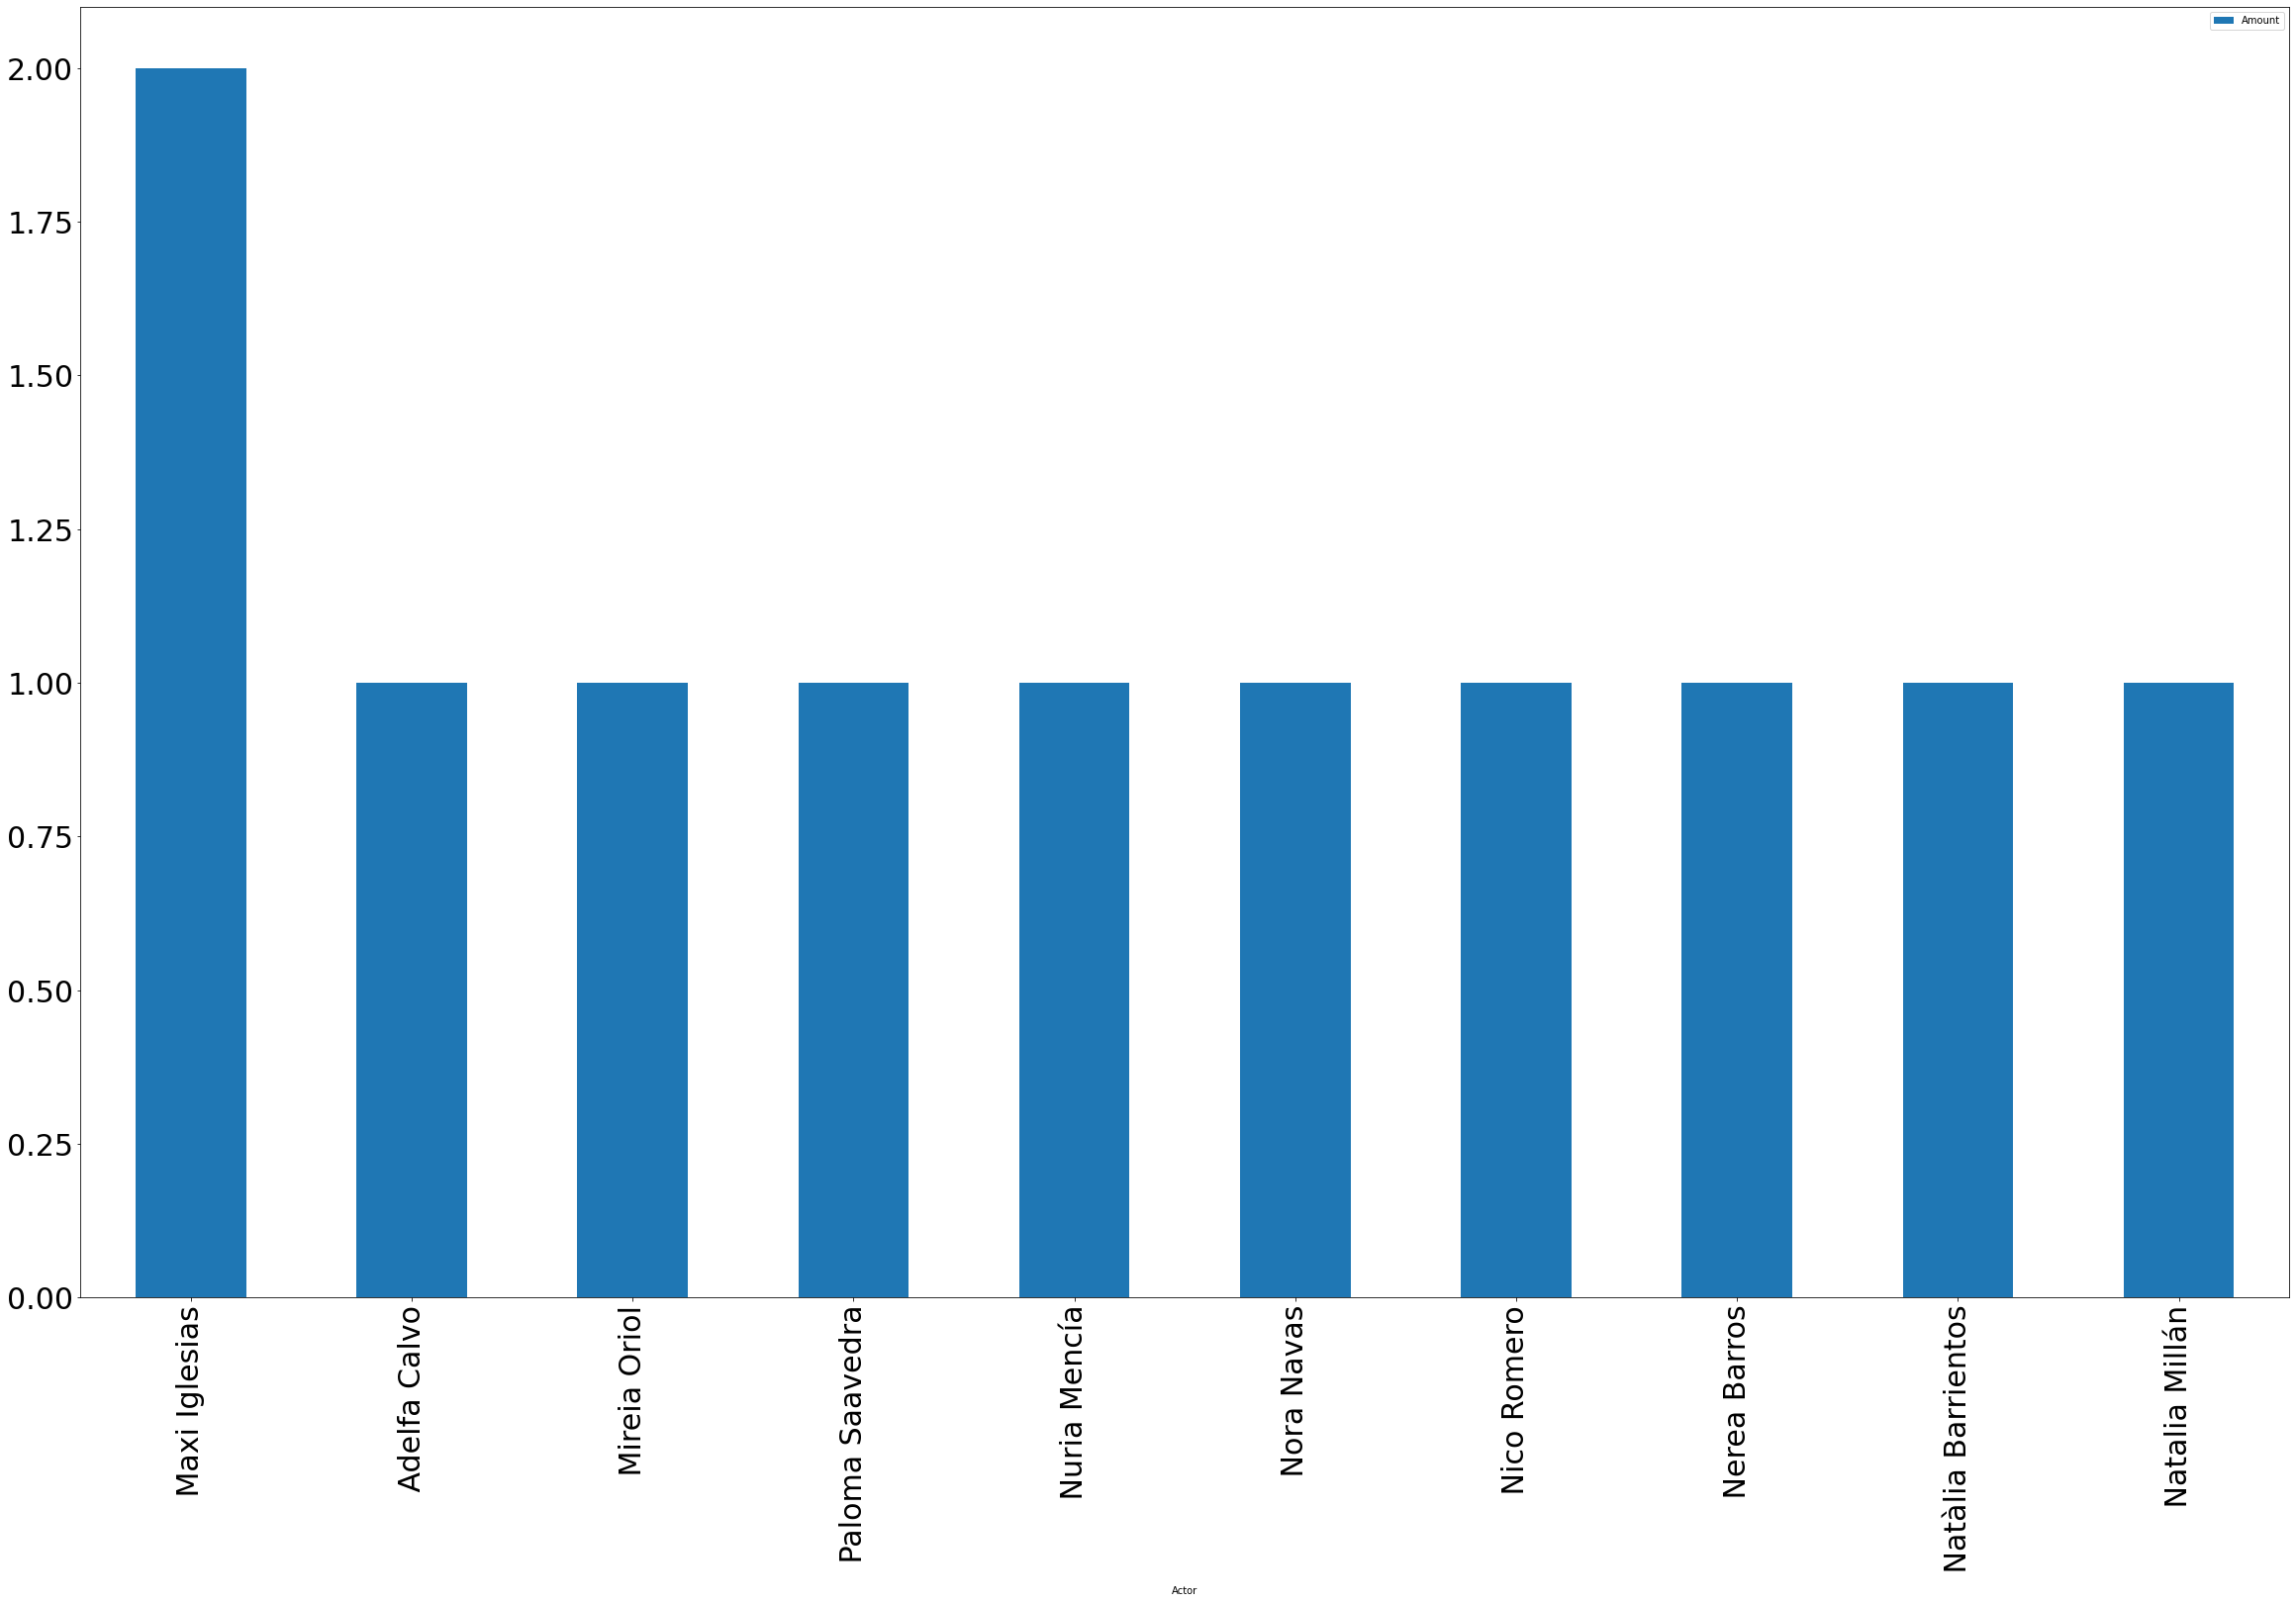

In [75]:
TV_Shows5 = df5[df5['type'] == 'TV Show']
TV_Shows5 = TV_Shows5[TV_Shows5['country'] == country5]
TV_Shows5 = TV_Shows5.reset_index()

TV_Shows5 = TV_Shows5.groupby(["cast"], as_index=False).count()
TV_Shows5 = TV_Shows5[['cast', 'show_id']]
TV_Shows5.columns = ['Actor', 'Amount']
TV_Shows5 = TV_Shows5.reset_index()
TV_Shows5['Actor'] = TV_Shows5['Actor'].str.split(',')

TV_Shows5 = (TV_Shows5
 .set_index(['index','Amount'])['Actor']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Actor'}))

TV_Shows5 = TV_Shows5.groupby(['Actor'], as_index=False).sum()
TV_Shows5 = TV_Shows5.sort_values('Amount', ascending=False)
TV_Shows5 = TV_Shows5.head(10)

TV_Shows5.plot(x ='Actor', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()


### Ερωτημα 6

Για αρχή, φτιάχνουμε 4 λίστες, μία για κάθε ηλικιακή ομάδα (μικρά παιδιά, μεγαλύτερα παιδιά, έφηβοι και ενήλικες) 
και σε κάθε λίστα βάζουμε τα ανάλογα rating (πχ PG-13 στην λίστα τον εφήβων) : 

In [76]:
df6 = df.copy()
df6 = df6.groupby(["type","rating"], as_index=False).count()

Little_Kids = ['G', 'TV-Y', 'TV-G']
Older_Kids = ['PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG']
Teens = ['PG-13', 'TV-14']
Mature = ['R', 'NC-17', 'TV-MA']


Πρώτα κάνουμε την διαδικασία για τις ταινίες. Φτιάχνουμε μια άδεια λίστα όπου θα κρατάμε το πλήθος των ταινιών (NumberOfMovies) και μια λίστα με τις ηλικιακές ομάδες (Categories). Χρησιμοποιώντας την συνάρτηση isin(), μετράμε με sum() πόσες ταινίες υπάρχουν για κάθε κατηγορία ηλικίας: 

<BarContainer object of 4 artists>

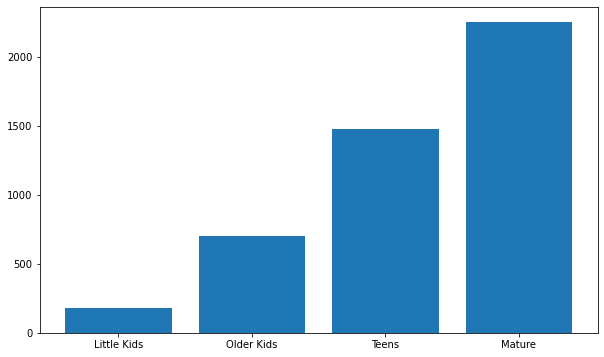

In [77]:
Movies6 = df6[df6["type"] == "Movie"]
Movies6 = Movies6[["rating", "show_id"]]
Movies6.columns = ["Rating", "Amount"]

NumberOfMovies = []
Categories = ['Little Kids', 'Older Kids', 'Teens', 'Mature']

Movies_little = Movies6[Movies6["Rating"].isin(Little_Kids)]
Movies_older = Movies6[Movies6["Rating"].isin(Older_Kids)]
Movies_Teens = Movies6[Movies6["Rating"].isin(Teens)]
Movies_Mature = Movies6[Movies6["Rating"].isin(Mature)]

NumberOfMovies.append(Movies_little['Amount'].sum())
NumberOfMovies.append(Movies_older['Amount'].sum())
NumberOfMovies.append(Movies_Teens['Amount'].sum())
NumberOfMovies.append(Movies_Mature['Amount'].sum())

fig = plt.figure(figsize=(10,6))
plt.bar(Categories,NumberOfMovies)


Κάνουμε την ίδια διαδικασία για τις σειρές: 

<BarContainer object of 4 artists>

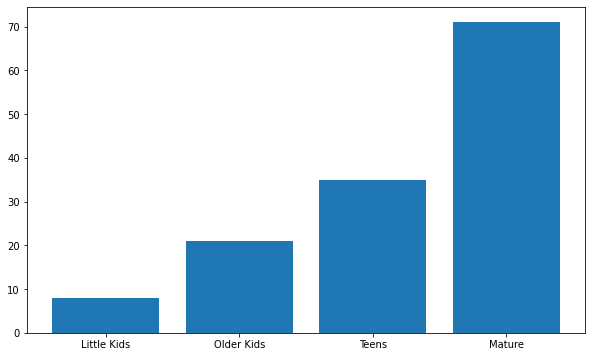

In [78]:
TV_Shows6 = df6[df6["type"] == "TV Show"]
TV_Shows6 = TV_Shows6[["rating", "show_id"]]
TV_Shows6.columns = ["Rating", "Amount"]

NumberOfTVShows = []
Categories = ['Little Kids', 'Older Kids', 'Teens', 'Mature']

TV_little = TV_Shows6[TV_Shows6['Rating'].isin(Little_Kids)]
TV_older = TV_Shows6[TV_Shows6['Rating'].isin(Older_Kids)]
TV_Teens = TV_Shows6[TV_Shows6['Rating'].isin(Teens)]
TV_Mature = TV_Shows6[TV_Shows6['Rating'].isin(Mature)]

NumberOfTVShows.append(TV_little['Amount'].sum())
NumberOfTVShows.append(TV_older['Amount'].sum())
NumberOfTVShows.append(TV_Teens['Amount'].sum())
NumberOfTVShows.append(TV_Mature['Amount'].sum())

fig = plt.figure(figsize=(10,6))
plt.bar(Categories,NumberOfTVShows)


### Ερωτημα 7 

Από την στιγμή που ο παραγωγός θέλει να βγάλει ταινία, κρατάμε μόνο τις ταινίες. Στην συνέχεια, φτιάχνουμε την λίστα months που
περιέχει 12 strings, ένα για κάθε μήνα. 

Χρησιμοποιώντας την συνάρτηση to_datetime για μήνα κρατάμε από τις ημερομηνίες μόνο τους μήνες οι οποίοι
θα είναι σε μορφή αριθμού (πχ 2 για Φλεβάρη).

Φτιάχνουμε μια συνάρτηση modifyMonth η οποία δέχεται ints. Μέσα στη συνάρτηση γίνεται
πρώτα ένας έλεγχος isna() ώστε να απορρίψουμε τιμές NaN και αν περάσουμε τον έλεγχο επιστρέφουμε τον string που βρίσκεται στην
x-1 θέση της λίστας με τους μήνες, όπου x ο αριθμός που δώσαμε στη συνάρτηση και -1 γιατί η λίστα μετράει θέσεις από το 0. 
Έτσι, αν, για παράδειγμα, η συνάρτηση πάρει την τιμή 4, θα επιστρέψει το string στην θέση 3 που είναι ο Απρίλης.

Στην συνέχεια κάνουμε apply την συνάρτηση στο Dataframe Movies ώστε να μετατρέψουμε το περιεχόμενο της στήλης "date_added" 
από νούμερο (πχ 4) σε string (πχ April).

Μετά, έχοντας κάνει group by και sort, φτιάχνουμε ένα plot με μήνες και αριθμό ταινιών.

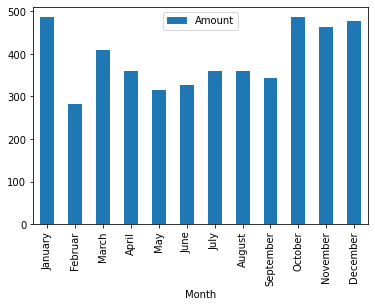

In [79]:
df7 = df.copy()

Movies = df7[df7["type"] == 'Movie']
Movies = Movies.reset_index()


months = ['January', 'Februar', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def modifyMonth(numer):
    if pd.isna(numer):
        return
    x = int(numer)
    month = months[x-1]
    return(month)

Movies['date_added'] = pd.to_datetime(Movies['date_added'], dayfirst=True)
Movies['date_added'] = pd.DatetimeIndex(Movies['date_added']).month

Movies = Movies.groupby('date_added', as_index = False).count()
Movies = Movies.sort_values('date_added')

Movies['date_added'] = Movies['date_added'].apply(modifyMonth)

Movies = Movies[["date_added", "show_id"]]
Movies.columns = ["Month", "Amount"]

Movies.plot.bar(x='Month', y='Amount')
plt.show()

### Ερωτημα 8

Κρατάμε πρώτα μόνο τις ταινίες και μετράμε τα είδη χρησιμοποιώντας split στα κόμματα για να μετρήσουμε σωστά 
καθώς κάποιες ταινίες έχουν παραπάνω από ένα είδος, χωρισμένα με "," . Μετράμε το πλήθος για κάθε είδος
μέσω της συνάρτησης sum() και φτιάχνουμε το ανάλογο plot.

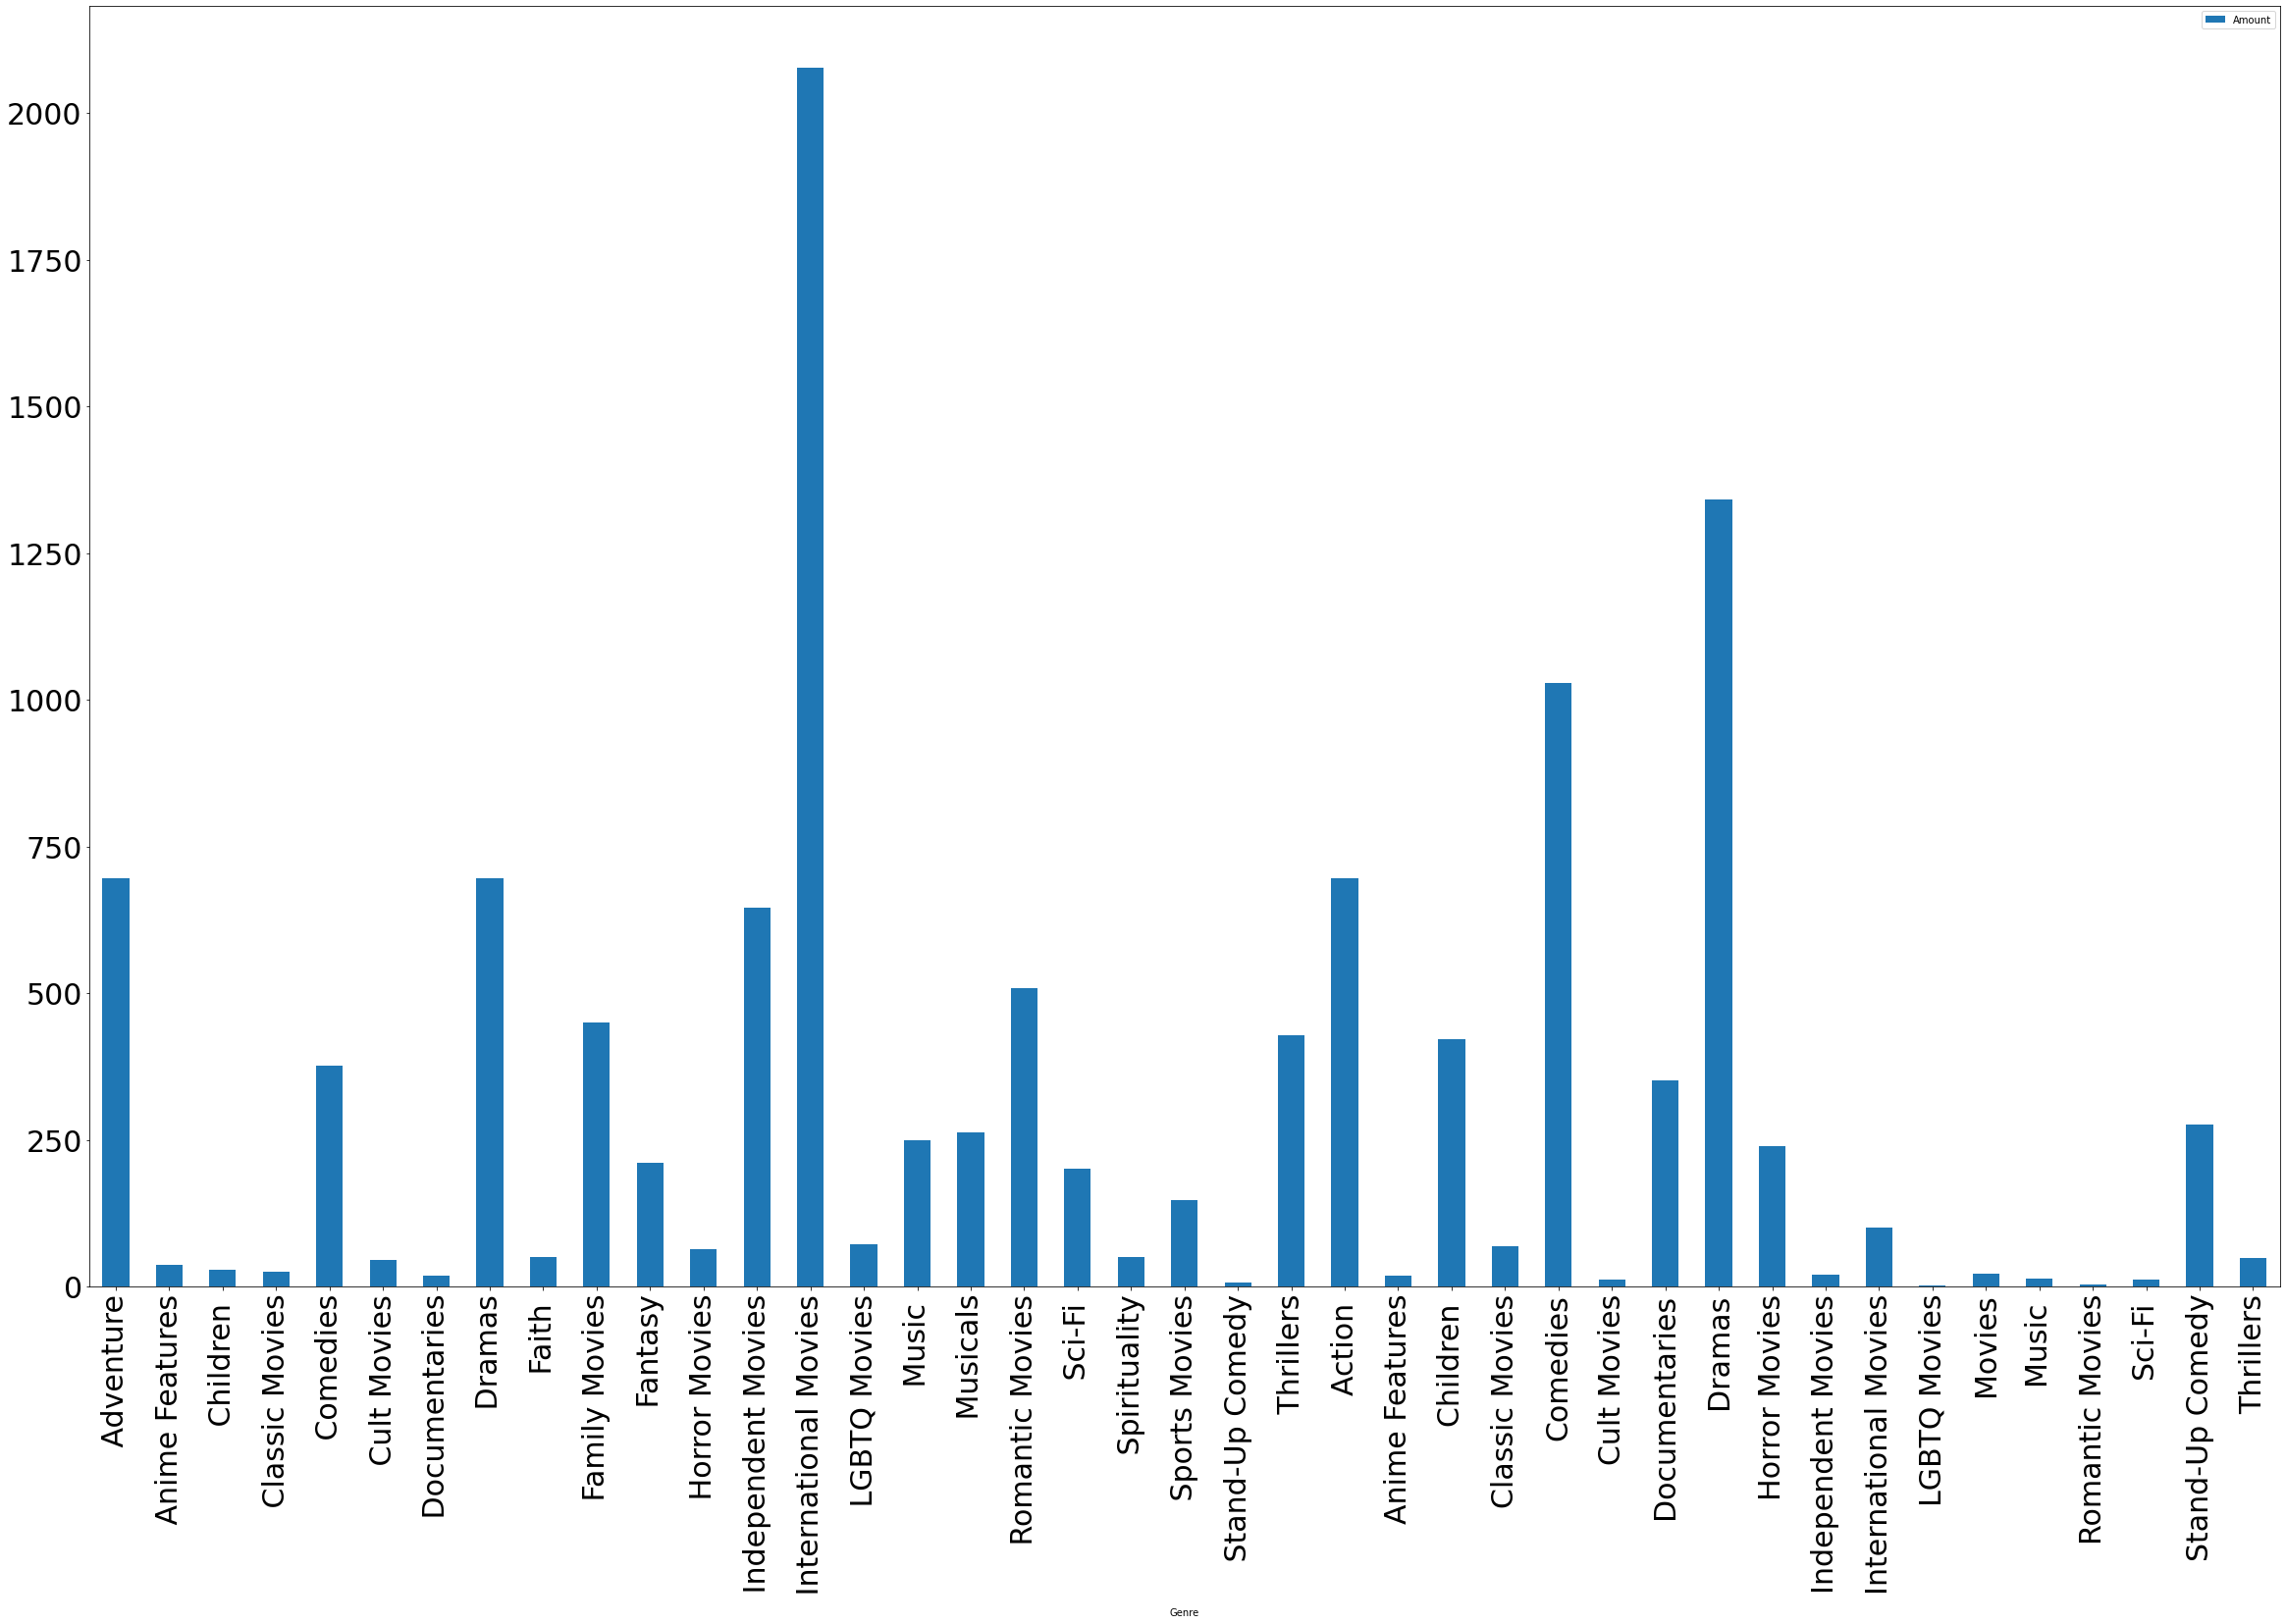

In [80]:
Movies8 = df.copy()
Movies8 = Movies8[Movies8["type"] == "Movie"]
Movies8 = Movies8.groupby(["listed_in"], as_index=False).count()
Movies8 = Movies8[['listed_in', 'show_id']]
Movies8.columns = ['Genre', 'Amount']
Movies8 = Movies8.reset_index()
Movies8['Genre'] = Movies8['Genre'].str.split(',')

    
Movies8 = (Movies8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))


Movies8['Genre'] = Movies8['Genre'].str.split('&')

    
Movies8 = (Movies8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))

Movies8 = Movies8.groupby(['Genre'], as_index=False).sum()

Movies8.plot(x ='Genre', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

Ομοίως για τις σειρές:

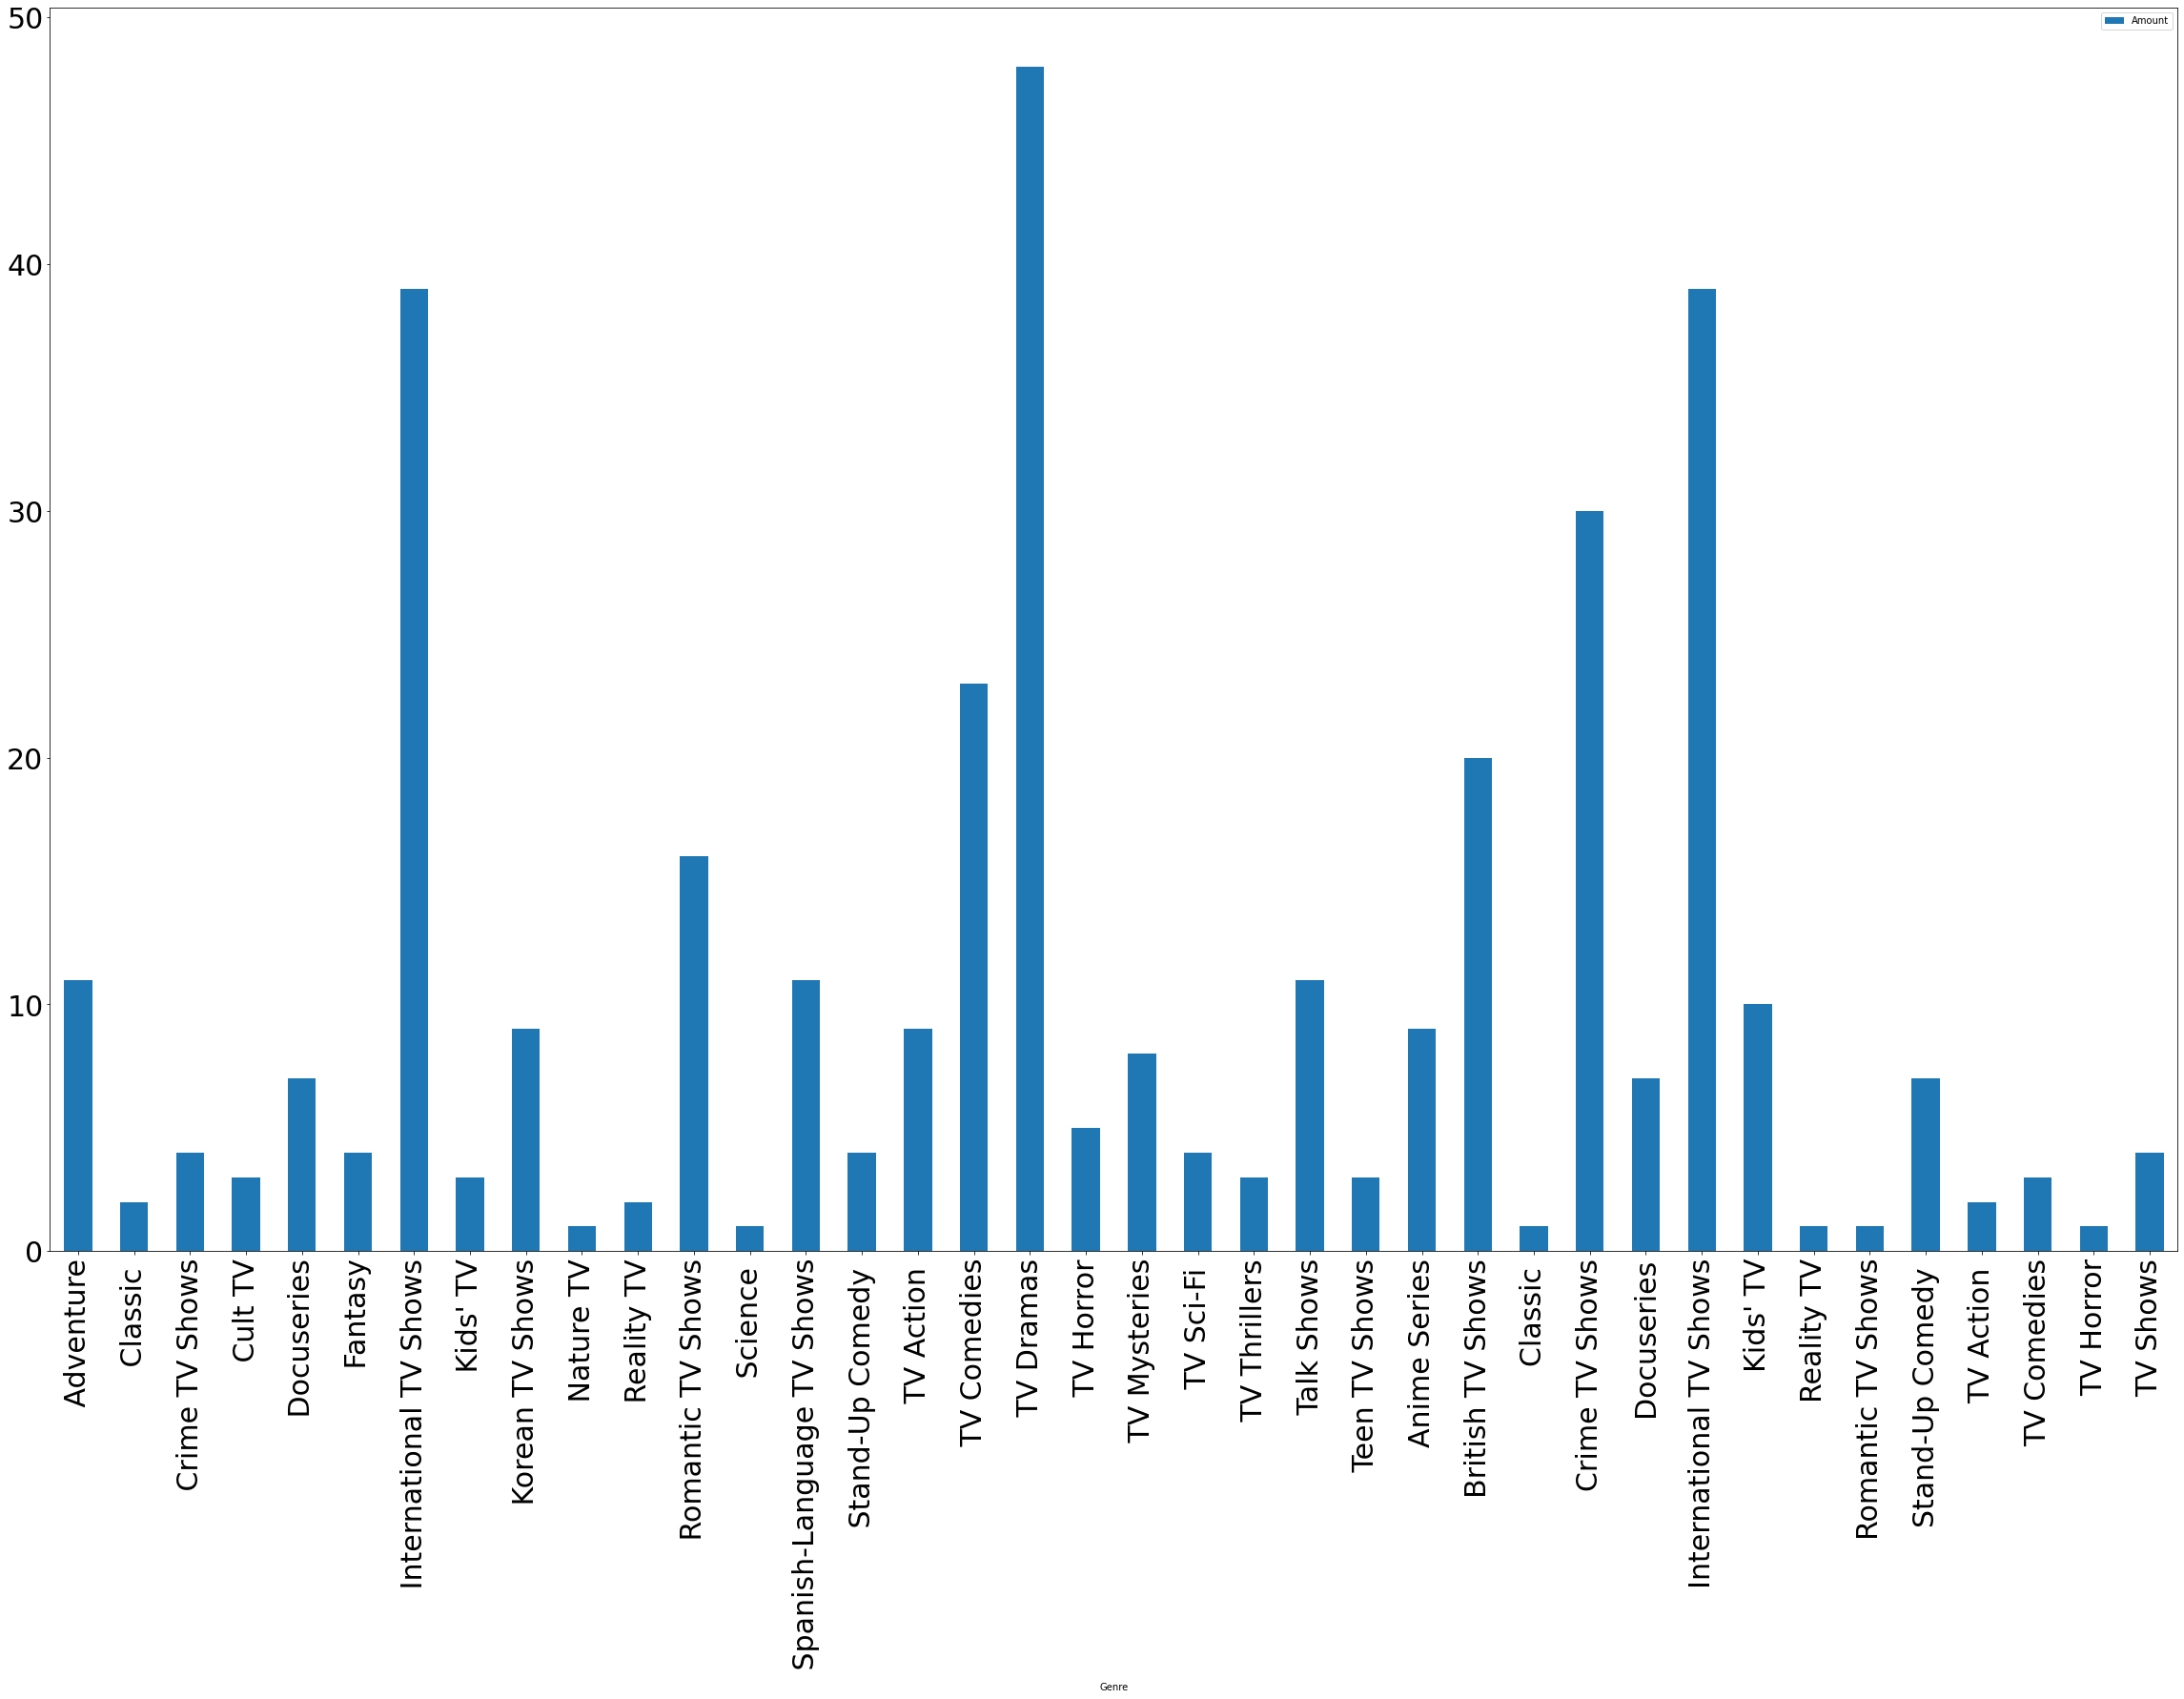

In [81]:
TV_Shows8 = df.copy()
TV_Shows8 = TV_Shows8[TV_Shows8["type"] == "TV Show"]
TV_Shows8 = TV_Shows8.groupby(["listed_in"], as_index=False).count()
TV_Shows8 = TV_Shows8[['listed_in', 'show_id']]
TV_Shows8.columns = ['Genre', 'Amount']
TV_Shows8 = TV_Shows8.reset_index()
TV_Shows8['Genre'] = TV_Shows8['Genre'].str.split(',')

    
TV_Shows8 = (TV_Shows8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))


TV_Shows8['Genre'] = TV_Shows8['Genre'].str.split('&')

    
TV_Shows8 = (TV_Shows8
 .set_index(['index','Amount'])['Genre']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .drop('level_2', axis=1)
 .rename(columns={0:'Genre'}))

TV_Shows8 = TV_Shows8.groupby(['Genre'], as_index=False).sum()

TV_Shows8.plot(x ='Genre', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

### Ερωτημα 9

Για ε̲π̲ι̲λ̲ο̲γ̲ή̲ ά̲λ̲λ̲η̲ς̲ χ̲ώ̲ρ̲α̲ς̲  , πέραν της Αμερικής που εκτυπώνεται by default, αρκεί ο χρήστης να αλλάξει στο επόμενο κελί 
την μεταβλητή country9: 

In [91]:
df9 = df.copy()

country9 = 'United States'


Κρατάμε μόνο τις ταινίες και κάνουμε group by και count τους σκηνόθετες και κρατάμε τους πρώτους 10 με head(10) ωστε να φτιάξουμε ένα plot που παρουσιάζει τους 10 σκηνοθέτες με τις περισσότερες ταινίες για την εκάστοτε χώρα.

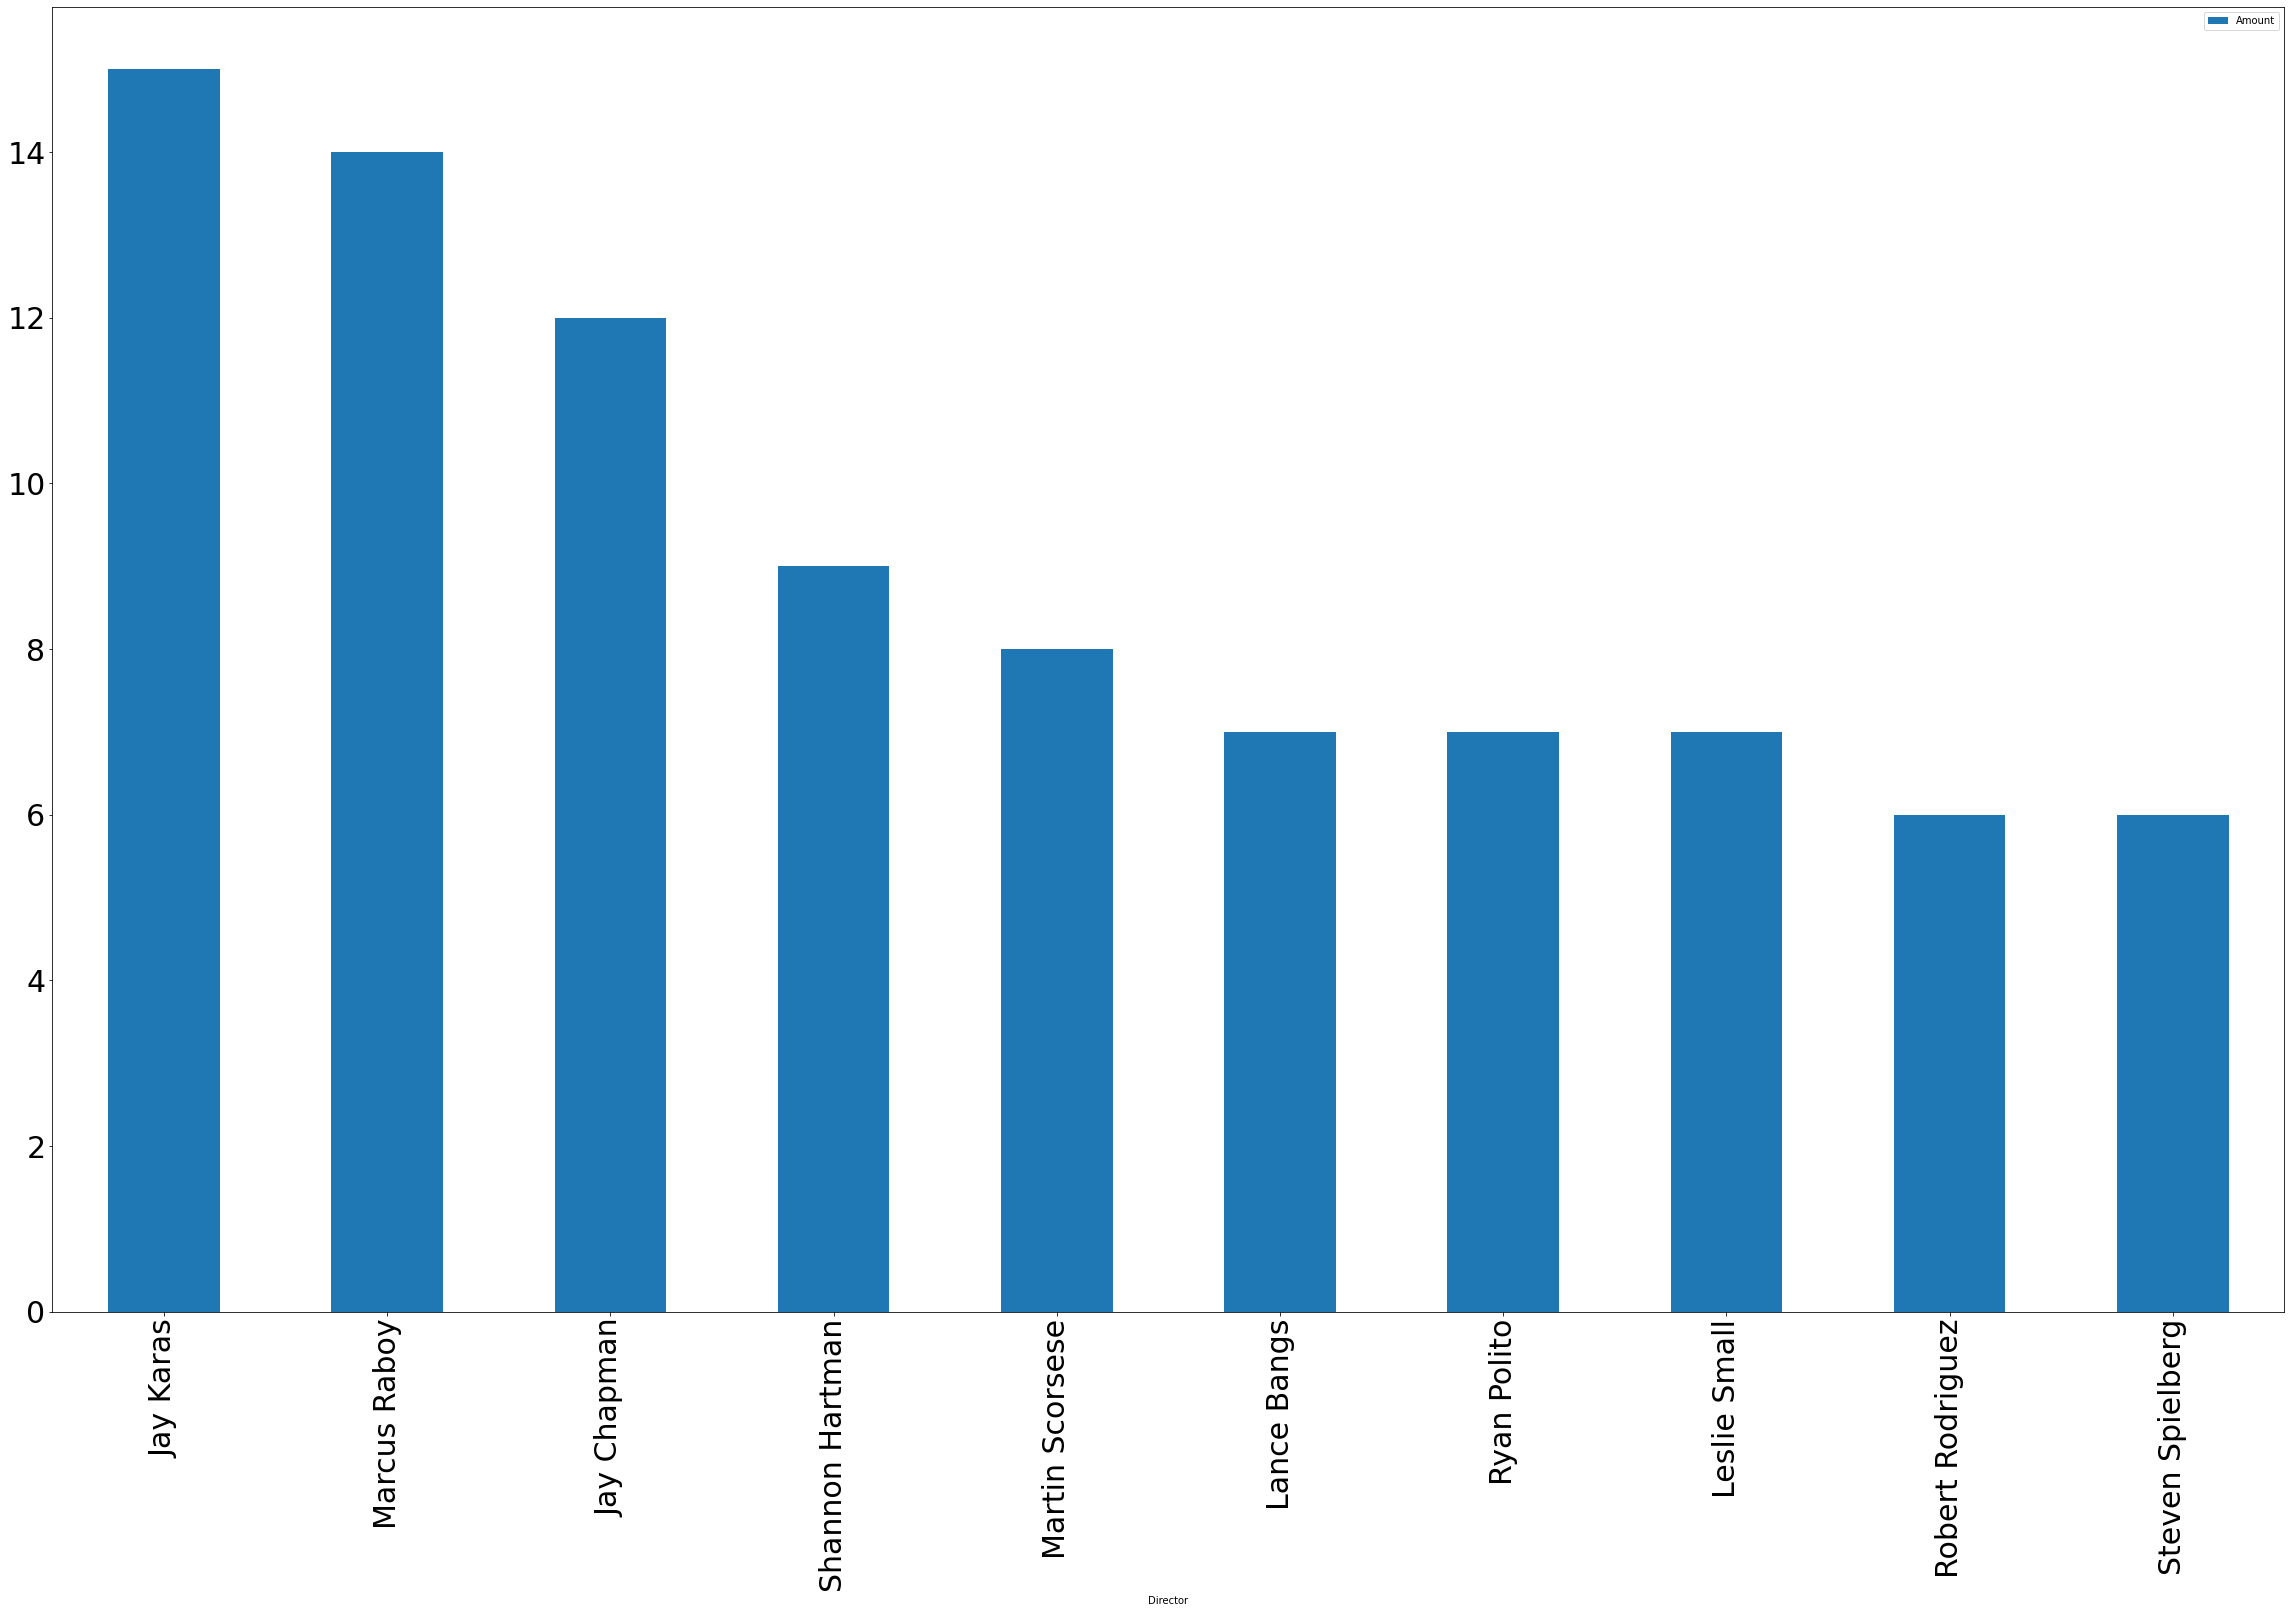

In [92]:
Movies9 = df9[df9['type'] == 'Movie']
Movies9 = Movies9[Movies9['country'] == country9]
Movies9 = Movies9.reset_index()

Movies9 = Movies9.groupby(["director"], as_index=False).count()
Movies9 = Movies9[['director', 'show_id']]
Movies9.columns = ['Director', 'Amount']
Movies9 = Movies9.reset_index()

Movies9 = Movies9.sort_values('Amount', ascending=False)
Movies9 = Movies9.head(10)

Movies9.plot(x ='Director', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()


Ομοίως, φτιάχνουμε ένα plot που δείχνει τους 10 σκηνοθέτες με τις περισσότερες σειρές για την εκάστοτε χώρα: 

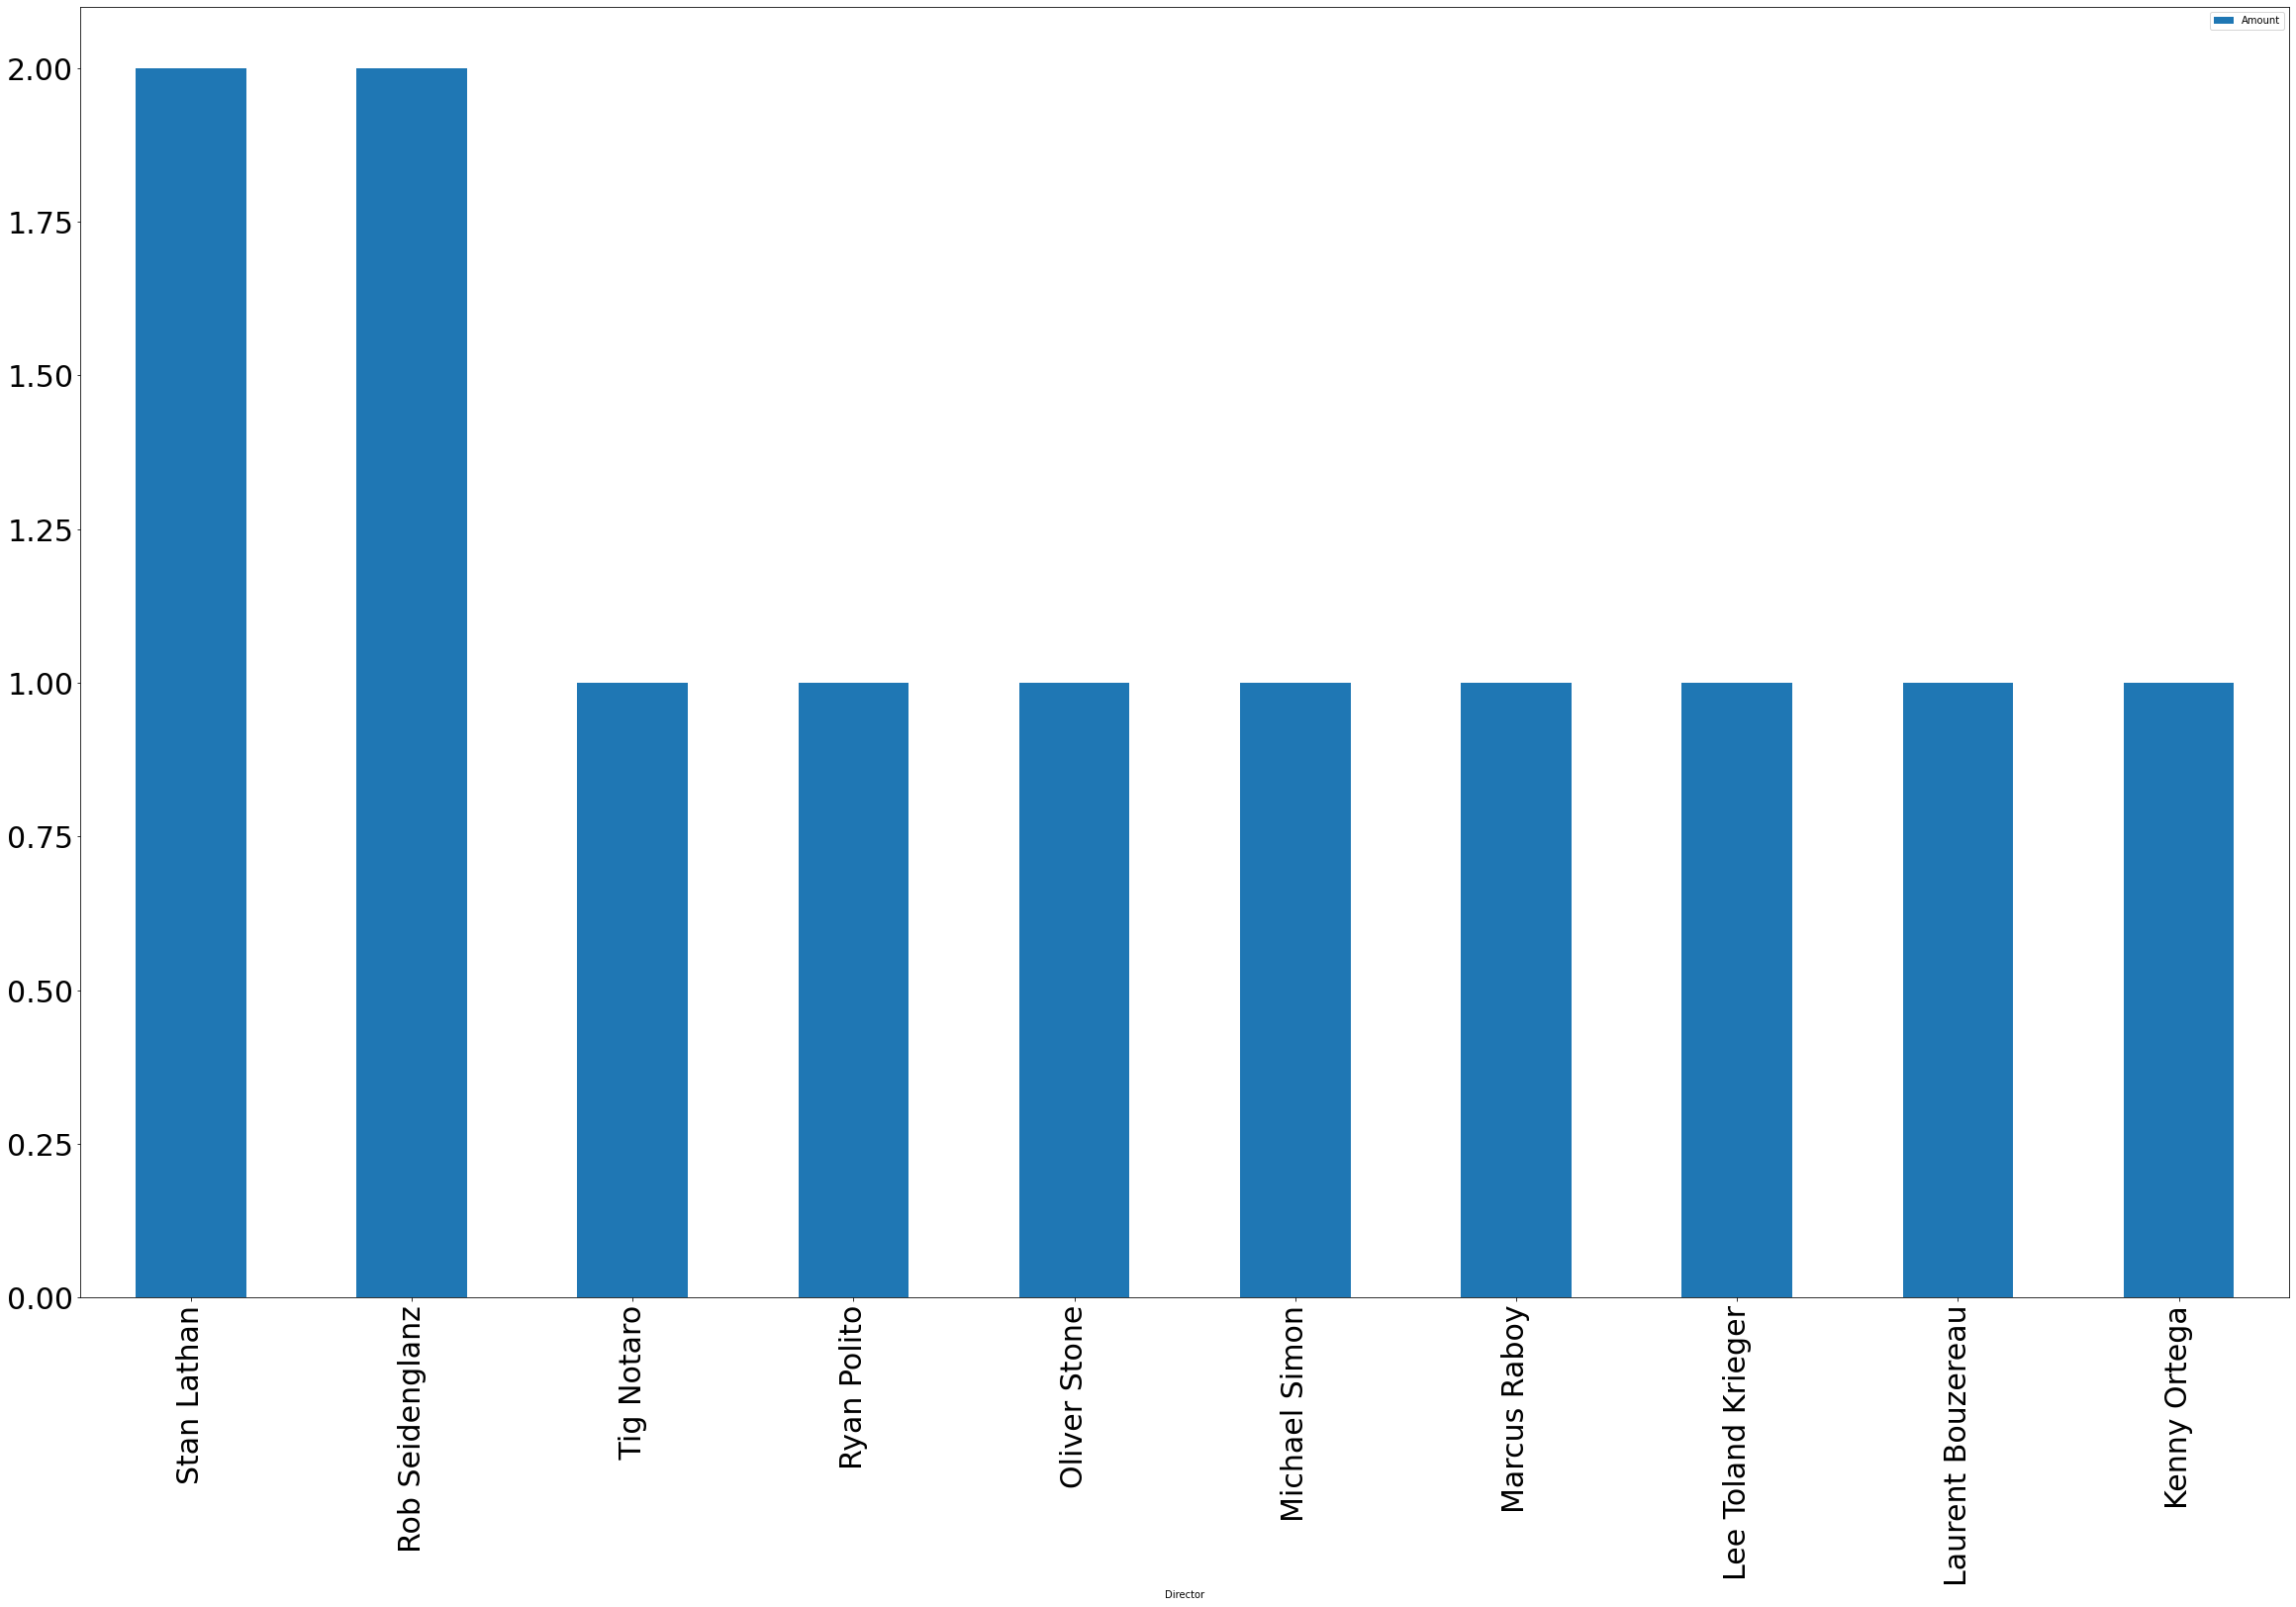

In [93]:
TV_Shows9 = df9[df9['type'] == 'TV Show']
TV_Shows9 = TV_Shows9[TV_Shows9['country'] == country9]
Movies9 = Movies9.reset_index()

TV_Shows9 = TV_Shows9.groupby(["director"], as_index=False).count()
TV_Shows9 = TV_Shows9[['director', 'show_id']]
TV_Shows9.columns = ['Director', 'Amount']
TV_Shows9 = TV_Shows9.reset_index()

TV_Shows9 = TV_Shows9.sort_values('Amount', ascending=False)
TV_Shows9 = TV_Shows9.head(10)

TV_Shows9.plot(x ='Director', y='Amount', kind = 'bar', figsize=(40,24), fontsize=30)
plt.show()

### Ερωτημα 10

Με την βοηθεια της συναρτησης "modifySeason" που φτιαξαμε, 
φερνουμε τα δεδομενα σε μορφη που να μπορουμε να τα αξοιοπησηουμε καλυτερα 
και ταξινομουμε τις σειρες με βαση το ποσες σεζον εχουμε και εμφανιζουμε 

[]

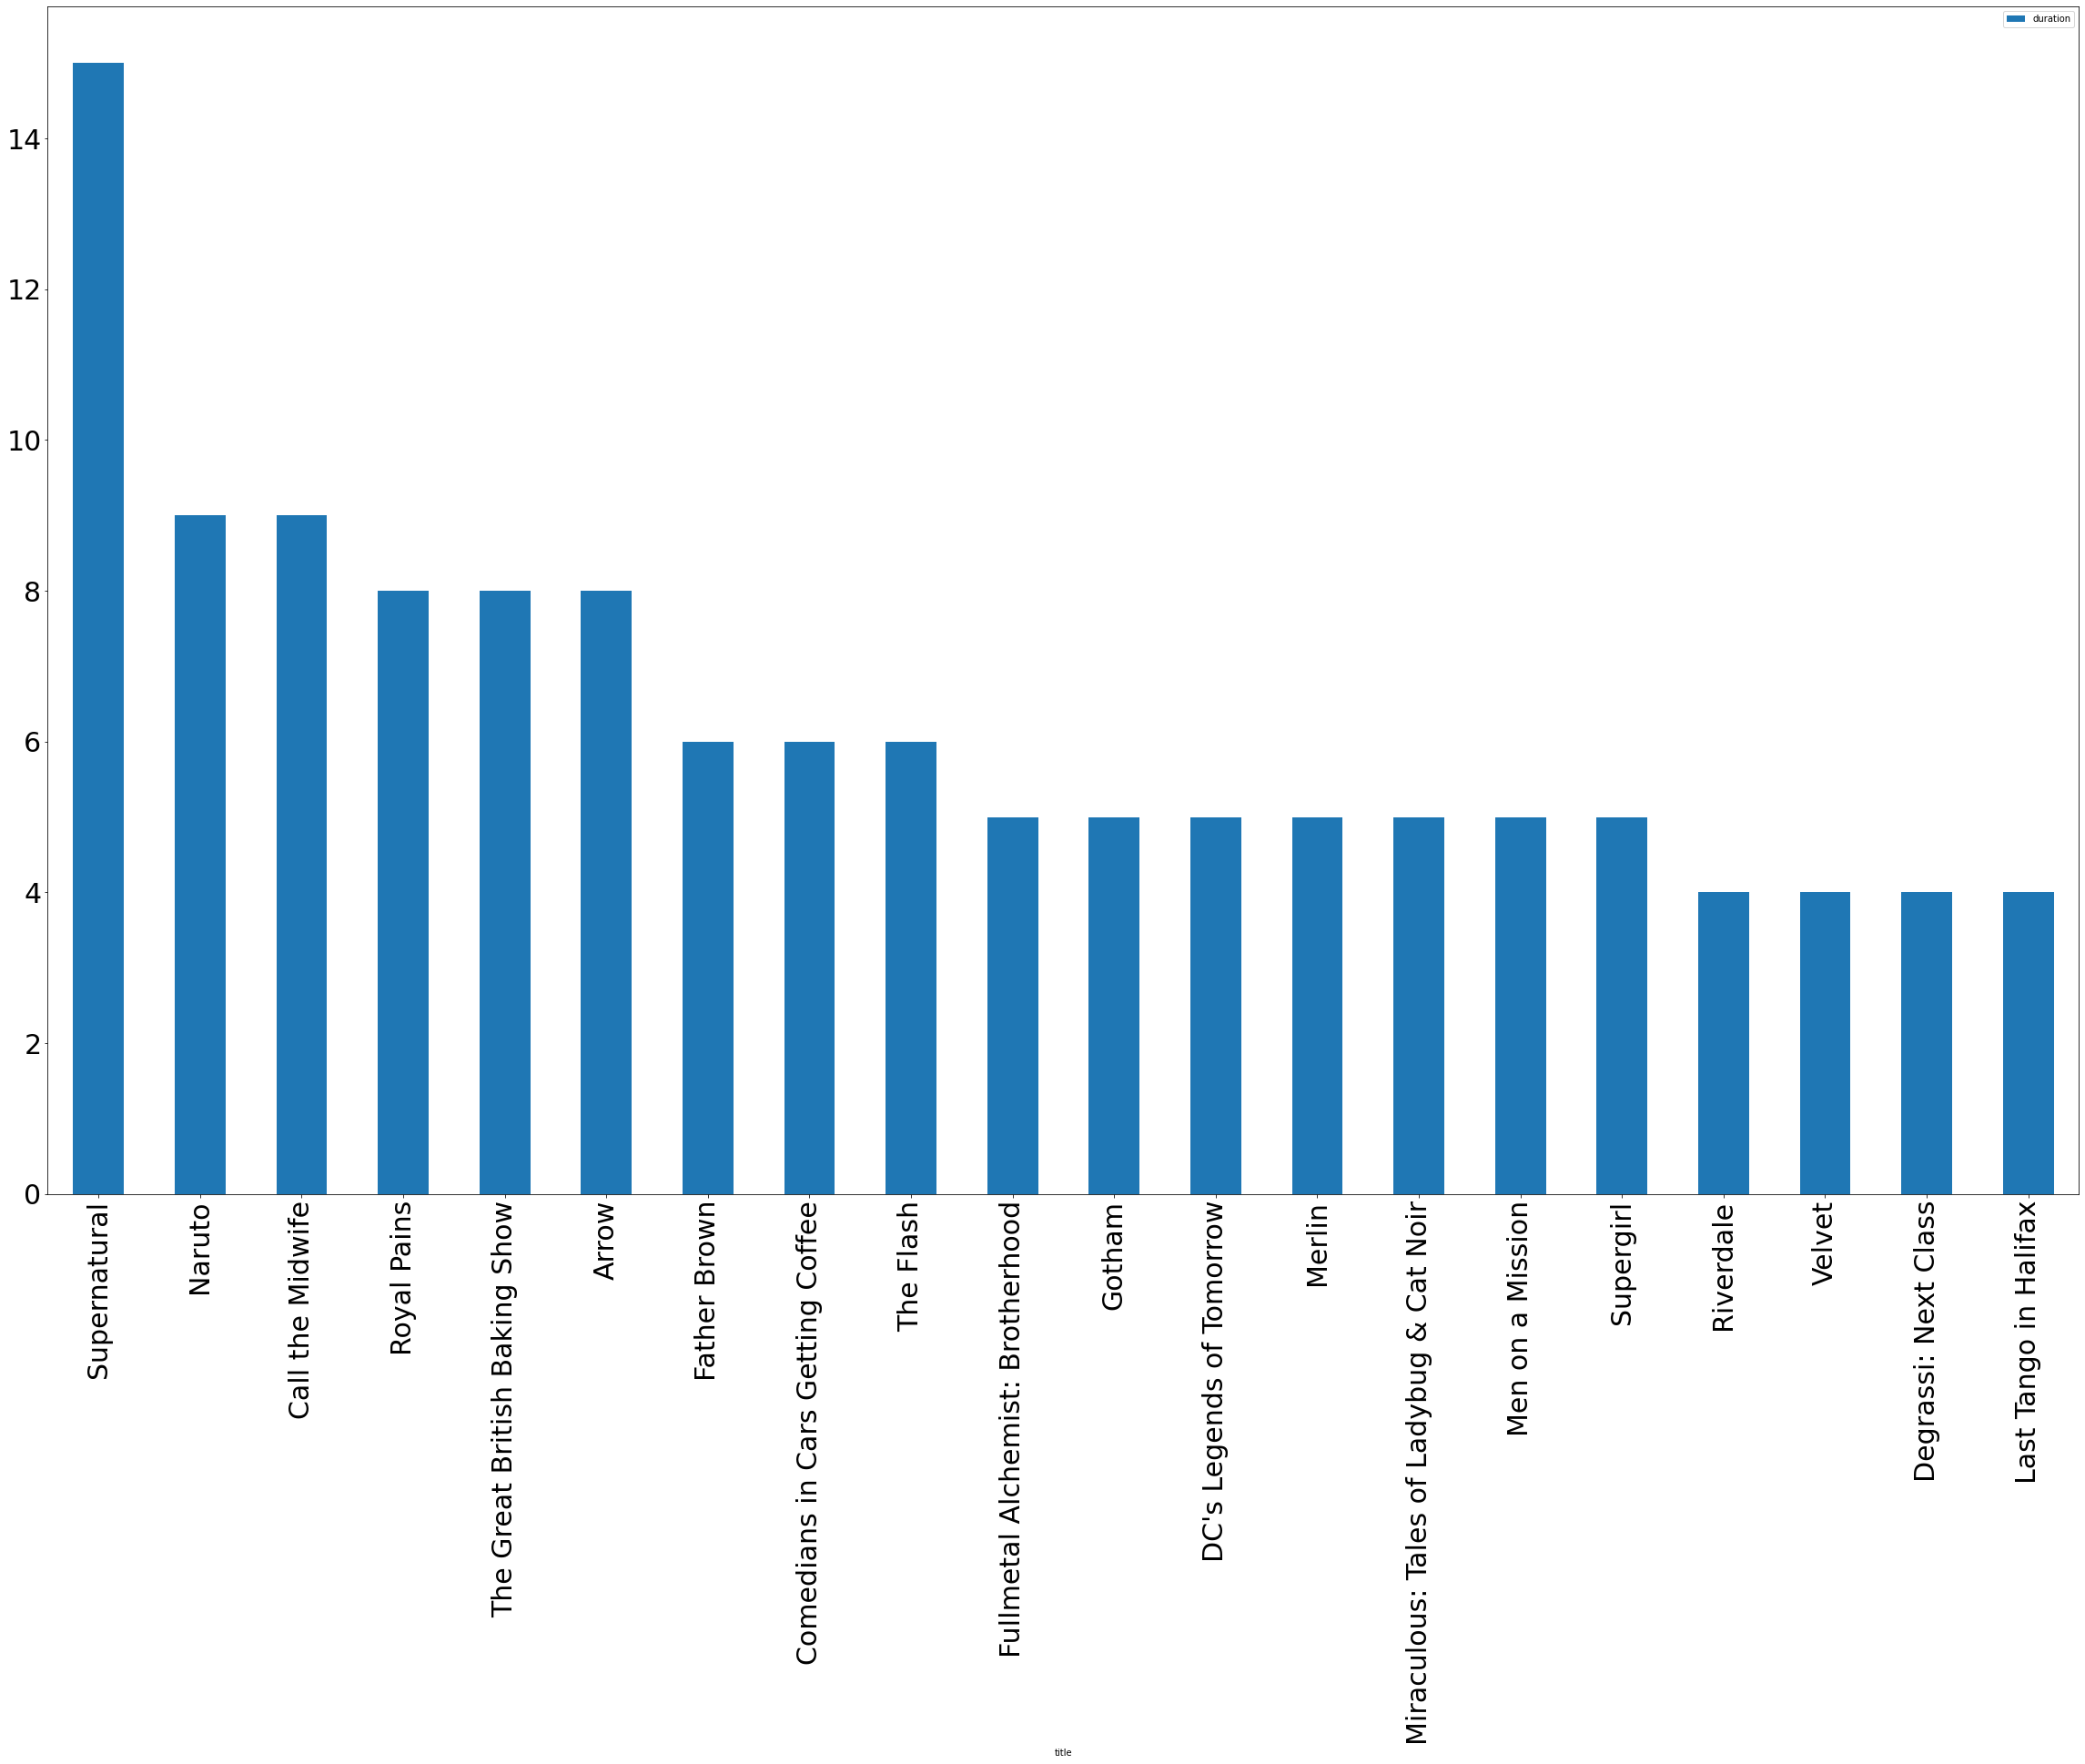

In [83]:
df10 = df.copy()
df10 = df10[df10["type"] == "TV Show"]
df10 = df10[["title", 'duration']]

def modifySeason(str):
    l = str.split()
    return int(l[0])

df10['duration'] = df10['duration'].apply(modifySeason)

df10 = df10.sort_values(by=['duration'], ascending=False)

df10 = df10.head(20)

df10.plot(x='title', y='duration', kind='bar', figsize=(40, 24), fontsize=30)
plt.plot()


### Ερωτημα 11

Για αυτο το ερωτημα αξιοποιησαμε ολα τα αρχεια που μας δοθηκαν
Τα βηματα που ακολυθηθηκαν ειναι τα εξης:

1) Τραβηξαμε τα δεδομενα απο το αρχειο 'IMDb movies.csv' και τα καθαρισαμε

2) Απομονοσαμε τις ταινιες που βρισκονται στο netflix απο ολες αυτες που βρισκονται στο IMDB

3) Τραβηξαμε και καθαρισαμε τα δεδομενα απο το αρχειο 'IMDb ratings.csv'

4) Ξεχωρισαμε τις ταινιες που εχουν κριτικη και ειναι στο netflix ,
τις ταξινομησαμε με βαση το weighted_average_vote και κρατησαμε τις 10 με την μεγαλυτερη βαθμολογια

In [ ]:
Location2 = r'./Data/IMDb movies.csv'

df11 = pd.read_csv(Location2, low_memory=False)
df11 = df11.dropna()
df11 = df11.reset_index()


In [ ]:
Movies11 = df[df['type'] == 'Movie']
Movies11 = Movies11.reset_index()

netflix_movies_list = Movies11['title'].to_list()

In [ ]:
MoviesImdb = df11[df11['title'].isin(netflix_movies_list)]
MoviesImdb_list = MoviesImdb['imdb_title_id'].to_list()

Εδώ έχουμε τα ratings :

In [ ]:
Location3 = r'./Data/IMDb ratings.csv'

ratings11 = pd.read_csv(Location3)
ratings11 = ratings11.dropna()
ratings11 = ratings11.reset_index()

In [ ]:
ratedMovies = ratings11[ratings11['imdb_title_id'].isin(MoviesImdb_list)]
ratedMovies = ratedMovies.sort_values('weighted_average_vote', ascending=False)

ratedMovies = ratedMovies.head(10)
ratedMovies_list = ratedMovies['imdb_title_id'].to_list()

In [ ]:
k = 1
for i in ratedMovies_list:
    movie = MoviesImdb.loc[MoviesImdb['imdb_title_id'] == i]['title'].item()
    print(str(k) + ') ' +movie)
    k+=1